# **pix2pix**

---

<font size = 4>pix2pix is a deep-learning method allowing image-to-image translation from one image domain type to another image domain type. It was first published by [Isola *et al.* in 2016](https://arxiv.org/abs/1611.07004). The image transformation requires paired images for training (supervised learning) and is made possible here by using a conditional Generative Adversarial Network (GAN) architecture to use information from the input image and obtain the equivalent translated image.

<font size = 4> **This particular notebook enables image-to-image translation learned from paired dataset. If you are interested in performing unpaired image-to-image translation, you should consider using the CycleGAN notebook instead.**

---

<font size = 4>*Disclaimer*:

<font size = 4>This notebook is part of the *Zero-Cost Deep-Learning to Enhance Microscopy* project (https://github.com/HenriquesLab/DeepLearning_Collab/wiki). Jointly developed by the Jacquemet (link to https://cellmig.org/) and Henriques (https://henriqueslab.github.io/) laboratories.

<font size = 4>This notebook is based on the following paper:

<font size = 4> **Image-to-Image Translation with Conditional Adversarial Networks** by Isola *et al.* on arXiv in 2016 (https://arxiv.org/abs/1611.07004)

<font size = 4>The source code of the PyTorch implementation of pix2pix can be found here: https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

<font size = 4>**Please also cite this original paper when using or developing this notebook.**

# **License**

---

In [63]:
#@markdown ##Double click to see the license information

#------------------------- LICENSE FOR ZeroCostDL4Mic------------------------------------
#This ZeroCostDL4Mic notebook is distributed under the MIT licence



#------------------------- LICENSE FOR CycleGAN ------------------------------------

#Copyright (c) 2017, Jun-Yan Zhu and Taesung Park
#All rights reserved.

#Redistribution and use in source and binary forms, with or without
#modification, are permitted provided that the following conditions are met:

#* Redistributions of source code must retain the above copyright notice, this
#  list of conditions and the following disclaimer.

#* Redistributions in binary form must reproduce the above copyright notice,
#  this list of conditions and the following disclaimer in the documentation
#  and/or other materials provided with the distribution.

#THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
#AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
#IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
#DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE
#FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL
#DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR
#SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER
#CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY,
#OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
#OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.


#--------------------------- LICENSE FOR pix2pix --------------------------------
#BSD License

#For pix2pix software
#Copyright (c) 2016, Phillip Isola and Jun-Yan Zhu
#All rights reserved.

#Redistribution and use in source and binary forms, with or without
#modification, are permitted provided that the following conditions are met:

#* Redistributions of source code must retain the above copyright notice, this
#  list of conditions and the following disclaimer.

#* Redistributions in binary form must reproduce the above copyright notice,
#  this list of conditions and the following disclaimer in the documentation
#  and/or other materials provided with the distribution.

#----------------------------- LICENSE FOR DCGAN --------------------------------
#BSD License

#For dcgan.torch software

#Copyright (c) 2015, Facebook, Inc. All rights reserved.

#Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

#Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

#Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

#Neither the name Facebook nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

#THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

# **How to use this notebook?**

---

<font size = 4>Video describing how to use our notebooks are available on youtube:
  - [**Video 1**](https://www.youtube.com/watch?v=GzD2gamVNHI&feature=youtu.be): Full run through of the workflow to obtain the notebooks and the provided test datasets as well as a common use of the notebook
  - [**Video 2**](https://www.youtube.com/watch?v=PUuQfP5SsqM&feature=youtu.be): Detailed description of the different sections of the notebook


---
### **Structure of a notebook**

<font size = 4>The notebook contains two types of cell:  

<font size = 4>**Text cells** provide information and can be modified by douple-clicking the cell. You are currently reading the text cell. You can create a new text by clicking `+ Text`.

<font size = 4>**Code cells** contain code and the code can be modfied by selecting the cell. To execute the cell, move your cursor on the `[ ]`-mark on the left side of the cell (play button appears). Click to execute the cell. After execution is done the animation of play button stops. You can create a new coding cell by clicking `+ Code`.

---
### **Table of contents, Code snippets** and **Files**

<font size = 4>On the top left side of the notebook you find three tabs which contain from top to bottom:

<font size = 4>*Table of contents* = contains structure of the notebook. Click the content to move quickly between sections.

<font size = 4>*Code snippets* = contain examples how to code certain tasks. You can ignore this when using this notebook.

<font size = 4>*Files* = contain all available files. After mounting your google drive (see section 1.) you will find your files and folders here.

<font size = 4>**Remember that all uploaded files are purged after changing the runtime.** All files saved in Google Drive will remain. You do not need to use the Mount Drive-button; your Google Drive is connected in section 1.2.

<font size = 4>**Note:** The "sample data" in "Files" contains default files. Do not upload anything in here!

---
### **Making changes to the notebook**

<font size = 4>**You can make a copy** of the notebook and save it to your Google Drive. To do this click file -> save a copy in drive.

<font size = 4>To **edit a cell**, double click on the text. This will show you either the source code (in code cells) or the source text (in text cells).
You can use the `#`-mark in code cells to comment out parts of the code. This allows you to keep the original code piece in the cell as a comment.

# **0. Before getting started**
---
<font size = 4> For pix2pix to train, **it needs to have access to a paired training dataset**. This means that the same image needs to be acquired in the two conditions and provided with indication of correspondence.

<font size = 4> Therefore, the data structure is important. It is necessary that all the input data are in the same folder and that all the output data is in a separate folder. The provided training dataset is already split in two folders called Training_source and Training_target. Information on how to generate a training dataset is available in our Wiki page: https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki

<font size = 4>**We strongly recommend that you generate extra paired images. These images can be used to assess the quality of your trained model (Quality control dataset)**. The quality control assessment can be done directly in this notebook.

<font size = 4> **Additionally, the corresponding input and output files need to have the same name**.

<font size = 4> Please note that you currently can **only use .PNG files!**


<font size = 4>Here's a common data structure that can work:
*   Experiment A
    - **Training dataset**
      - Training_source
        - img_1.png, img_2.png, ...
      - Training_target
        - img_1.png, img_2.png, ...
    - **Quality control dataset**
     - Training_source
        - img_1.png, img_2.png
      - Training_target
        - img_1.png, img_2.png
    - **Data to be predicted**
    - **Results**

---
<font size = 4>**Important note**

<font size = 4>- If you wish to **Train a network from scratch** using your own dataset (and we encourage everyone to do that), you will need to run **sections 1 - 4**, then use **section 5** to assess the quality of your model and **section 6** to run predictions using the model that you trained.

<font size = 4>- If you wish to **Evaluate your model** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 5** to assess the quality of your model.

<font size = 4>- If you only wish to **run predictions** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 6** to run the predictions on the desired model.
---

# **1. Install pix2pix and dependencies**
---


In [64]:
#Here, we install libraries which are not already included in Colab.
#!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix
import os
pix2pix_working_directory = "/home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/PIX2PIX-MODELS/working_dir/"
pix2pix_code_dir = "/home/ocb/HardDrive_4TB/EGM/PHX/PhotoFITT/notebooks/deep-learning/pix2pix/"
# TODO: check if we can remove this chdir
os.chdir(os.path.join(pix2pix_code_dir, 'pytorch-CycleGAN-and-pix2pix/'))
!ls
#!pip install -r requirements.txt

bash_training_logs  docs	     models	    requirements.txt  util
CycleGAN.ipynb	    environment.yml  options	    scripts
data		    imgs	     pix2pix.ipynb  test.py
datasets	    LICENSE	     README.md	    train.py


In [65]:
Notebook_version = '1.16.4'
Network = 'pix2pix'


from builtins import any as b_any

def get_requirements_path():
    # Store requirements file in 'contents' directory
    current_dir = os.getcwd()
    dir_count = current_dir.count('/') - 1
    path = '../' * (dir_count) + 'requirements.txt'
    return path

def filter_files(file_list, filter_list):
    filtered_list = []
    for fname in file_list:
        if b_any(fname.split('==')[0] in s for s in filter_list):
            filtered_list.append(fname)
    return filtered_list

def build_requirements_file(before, after):
    path = get_requirements_path()

    # Exporting requirements.txt for local run
    !pip freeze > $path

    # Get minimum requirements file
    df = pd.read_csv(path)
    mod_list = [m.split('.')[0] for m in after if not m in before]
    req_list_temp = df.values.tolist()
    req_list = [x[0] for x in req_list_temp]

    # Replace with package name and handle cases where import name is different to module name
    mod_name_list = [['sklearn', 'scikit-learn'], ['skimage', 'scikit-image']]
    mod_replace_list = [[x[1] for x in mod_name_list] if s in [x[0] for x in mod_name_list] else s for s in mod_list]
    filtered_list = filter_files(req_list, mod_replace_list)

    file=open(path,'w')
    for item in filtered_list:
        file.writelines(item)

    file.close()

import sys
before = [str(m) for m in sys.modules]

#@markdown ##Install pix2pix and dependencies

#Here, we install libraries which are not already included in Colab.
#!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix
import os
#pix2pix_code_dir = os.getcwd()
#os.chdir(os.path.join(pix2pix_code_dir, "pytorch-CycleGAN-and-pix2pix"))
#!pip install -r requirements.txt
#!pip install fpdf2
#!pip install lpips
## Install the BioImage Model Zoo library
#!pip install bioimageio.core=="0.5.11"

import lpips
from PIL import Image
import imageio
from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms
import os.path

# ------- Common variable to all ZeroCostDL4Mic notebooks -------
import numpy as np
from matplotlib import pyplot as plt
import urllib
import os, random
import shutil
import zipfile
from tifffile import imread, imsave
import time
import sys
from pathlib import Path
import pandas as pd
import csv
from glob import glob
from scipy import signal, ndimage, stats
from skimage import io
from sklearn.linear_model import LinearRegression
from skimage.util import img_as_uint
import matplotlib as mpl
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio as psnr
from astropy.visualization import simple_norm
from skimage import img_as_float32
from skimage.util import img_as_ubyte
from tqdm import tqdm
from fpdf import FPDF, HTMLMixin
from datetime import datetime
import subprocess
from pip._internal.operations.freeze import freeze
import glob
import cv2

from bioimageio.core.build_spec import build_model
from bioimageio.core.resource_tests import test_model
from bioimageio.core import predict_image

# Colors for the warning messages
class bcolors:
  WARNING = '\033[31m'

#Disable some of the tensorflow warnings
import warnings
warnings.filterwarnings("ignore")

print('----------------------------')
print("Libraries installed")


# Check if this is the latest version of the notebook
All_notebook_versions = pd.read_csv("https://raw.githubusercontent.com/HenriquesLab/ZeroCostDL4Mic/master/Colab_notebooks/Latest_Notebook_versions.csv", dtype=str)
print('Notebook version: '+Notebook_version)
Latest_Notebook_version = All_notebook_versions[All_notebook_versions["Notebook"] == Network]['Version'].iloc[0]
print('Latest notebook version: '+Latest_Notebook_version)
if Notebook_version == Latest_Notebook_version:
  print("This notebook is up-to-date.")
else:
  print(bcolors.WARNING +"A new version of this notebook has been released. We recommend that you download it at https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki")

# average function
def Average(lst):
    return sum(lst) / len(lst)

def ssim(img1, img2, multichannel=False):
    if multichannel:
        return structural_similarity(img1,img2,data_range=1.,full=True, multichannel=True)
    else:
        return structural_similarity(img1,img2,data_range=1.,full=True, gaussian_weights=True, use_sample_covariance=False, sigma=1.5)

def normalize(x, pmin=3, pmax=99.8, axis=None, clip=False, eps=1e-20, dtype=np.float32):
    mi = np.percentile(x,pmin,axis=axis,keepdims=True)
    ma = np.percentile(x,pmax,axis=axis,keepdims=True)
    return normalize_mi_ma(x, mi, ma, clip=clip, eps=eps, dtype=dtype)


def normalize_mi_ma(x, mi, ma, clip=False, eps=1e-20, dtype=np.float32):
    x   = x.astype(dtype,copy=False)
    mi  = dtype(mi) if np.isscalar(mi) else mi.astype(dtype,copy=False)
    ma  = dtype(ma) if np.isscalar(ma) else ma.astype(dtype,copy=False)
    eps = dtype(eps)

    try:
        import numexpr
        x = numexpr.evaluate("(x - mi) / ( ma - mi + eps )")
    except ImportError:
        x =                   (x - mi) / ( ma - mi + eps )

    if clip:
        x = np.clip(x,0,1)

    return x

def norm_minmse(gt, x):
    gt = normalize(gt, 0.1, 99.9, clip=False).astype(np.float32, copy = False)
    x = x.astype(np.float32, copy=False) - np.mean(x)
    #x = x - np.mean(x)
    gt = gt.astype(np.float32, copy=False) - np.mean(gt)
    #gt = gt - np.mean(gt)
    scale = np.cov(x.flatten(), gt.flatten())[0, 1] / np.var(x.flatten())
    return gt, scale * x

def prepare_qc_dir(QC_model_path, QC_model_name, Im_path):
    # Create a quality control/Prediction Folder
    QC_prediction_results = QC_model_path+"/"+QC_model_name+"/Quality Control/Prediction"

    if os.path.exists(QC_prediction_results):
        print("The QC folder has been removed to save the new results")
        shutil.rmtree(QC_prediction_results)

    os.makedirs(QC_prediction_results, exist_ok=True)

    # Here we need to move the data to be analysed so that pix2pix can find them
    Saving_path_QC = os.path.join(Im_path, QC_model_name+"_images")

    #if os.path.exists(Saving_path_QC):
    #    shutil.rmtree(Saving_path_QC)
    os.makedirs(Saving_path_QC, exist_ok=True)

    # Folde to save the images in the correct format
    Saving_path_QC_folder = os.path.join(Saving_path_QC, "QC")

    os.makedirs(Saving_path_QC_folder, exist_ok=True)

    imageA_folder = os.path.join(Saving_path_QC_folder, "A", "test")
    os.makedirs(imageA_folder, exist_ok=True)

    imageB_folder = os.path.join(Saving_path_QC_folder, "B", "test")
    os.makedirs(imageB_folder, exist_ok=True)

    imageAB_folder = os.path.join(Saving_path_QC_folder, "AB", "test")
    os.makedirs(imageAB_folder, exist_ok=True)
    return QC_prediction_results, Saving_path_QC_folder

#Here we copy and normalise the data
def normalise_data(Source_QC_folder, Target_QC_folder, Normalisation_QC_source, Normalisation_QC_target, Im_path):
    if Normalisation_QC_source == "Contrast stretching":

        for filename in os.listdir(Source_QC_folder):

            img = io.imread(os.path.join(Source_QC_folder,filename)).astype(np.float32)
            short_name = os.path.splitext(filename)

            p2, p99 = np.percentile(img, (1., 99.9))
            img = exposure.rescale_intensity(img, in_range=(p2, p99))

            img = 255 * img # Now scale by 255
            img = img.astype(np.uint8)
            cv2.imwrite(os.path.join(Im_path, "A", "test", f"{short_name[0]}.png"), img)

    if Normalisation_QC_target == "Contrast stretching":
        for filename in os.listdir(Target_QC_folder):

            img = io.imread(os.path.join(Target_QC_folder,filename)).astype(np.float32)
            short_name = os.path.splitext(filename)

            p2, p99 = np.percentile(img, (1., 99.9))
            img = exposure.rescale_intensity(img, in_range=(p2, p99))

            img = 255 * img # Now scale by 255
            img = img.astype(np.uint8)
            cv2.imwrite(os.path.join(Im_path, "B", "test", f"{short_name[0]}.png"), img)

    if Normalisation_QC_source == "Adaptive Equalization":
        for filename in os.listdir(Source_QC_folder):

            img = io.imread(os.path.join(Source_QC_folder,filename))
            short_name = os.path.splitext(filename)

            img = exposure.equalize_adapthist(img, clip_limit=0.03)

            img = 255 * img # Now scale by 255
            img = img.astype(np.uint8)
            cv2.imwrite(os.path.join(Im_path, "A", "test", f"{short_name[0]}.png"), img)


    if Normalisation_QC_target == "Adaptive Equalization":
        for filename in os.listdir(Target_QC_folder):

            img = io.imread(os.path.join(Target_QC_folder,filename))
            short_name = os.path.splitext(filename)

            img = exposure.equalize_adapthist(img, clip_limit=0.03)

            img = 255 * img # Now scale by 255
            img = img.astype(np.uint8)
            cv2.imwrite(os.path.join(Im_path, "B", "test", f"{short_name[0]}.png"), img)

    if Normalisation_QC_source == "None":
        for filename in os.listdir(Source_QC_folder):
            img = io.imread(os.path.join(Source_QC_folder,filename))
            short_name = os.path.splitext(filename)
            cv2.imwrite(os.path.join(Im_path, "A", "test", f"{short_name[0]}.png"), img)
            
    if Normalisation_QC_target == "None":
        for filename in os.listdir(Target_QC_folder):
            img = io.imread(os.path.join(Target_QC_folder,filename))
            short_name = os.path.splitext(filename)
            cv2.imwrite(os.path.join(Im_path, "B", "test", f"{short_name[0]}.png"), img)

def QC_RGB(Source_QC_folder, QC_folder):

    # List images in Source_QC_folder
    csv_file = os.path.join(QC_folder, f"QC_metrics_{QC_model_name}{str(checkpoints)}.csv")
    # Open and create the csv file that will contain all the QC metrics
    with open(csv_file, "w", newline='') as file:
        writer = csv.writer(file)
    # Write the header in the csv file
        writer.writerow(["image #","Prediction v. GT mSSIM","Input v. GT mSSIM" , "Prediction v. GT lpips", "Input v. GT lpips"])
    # Initiate list
        ssim_score_list = []
        lpips_score_list = []

    # Let's loop through the provided dataset in the QC folders
        for i in os.listdir(Source_QC_folder):
            if not os.path.isdir(os.path.join(Source_QC_folder,i)):
                print('Running QC on: '+i)

                shortname_no_PNG = i[:-4]

                # -------------------------------- Target test data (Ground truth) --------------------------------
                test_GT = imageio.imread(os.path.join(QC_folder, f"{shortname_no_PNG}_real_B.png"))
                # -------------------------------- Source test data --------------------------------
                test_source = imageio.imread(os.path.join(QC_folder, f"{shortname_no_PNG}_real_A.png"))
                # -------------------------------- Prediction --------------------------------
                test_prediction = imageio.imread(os.path.join(QC_folder,f"{shortname_no_PNG}_fake_B.png"))
                #--------------------------- Here we normalise using histograms matching--------------------------------
                test_prediction_matched = match_histograms(test_prediction, test_GT, multichannel=True)
                test_source_matched = match_histograms(test_source, test_GT, multichannel=True)
                # -------------------------------- Calculate the metric maps and save them --------------------------------
                # Calculate the SSIM maps
                index_SSIM_GTvsPrediction, img_SSIM_GTvsPrediction = ssim(test_GT, test_prediction_matched, multichannel=True)
                index_SSIM_GTvsSource, img_SSIM_GTvsSource = ssim(test_GT, test_source_matched, multichannel=True)
                ssim_score_list.append(index_SSIM_GTvsPrediction)

                #Save ssim_maps
                img_SSIM_GTvsPrediction_8bit = (img_SSIM_GTvsPrediction* 255).astype("uint8")
                io.imsave(os.path.join(QC_folder, f"SSIM_GTvsPrediction_{shortname_no_PNG}.tif"), img_SSIM_GTvsPrediction_8bit)

                img_SSIM_GTvsSource_8bit = (img_SSIM_GTvsSource* 255).astype("uint8")
                io.imsave(os.path.join(QC_folder, f"SSIM_GTvsSource_{shortname_no_PNG}.tif"),img_SSIM_GTvsSource_8bit)

                # -------------------------------- Pearson correlation coefficient --------------------------------

          # -------------------------------- Calculate the perceptual difference metrics map and save them --------------------------------
            if Do_lpips_analysis:

                lpips_GTvsPrediction = perceptual_diff(test_GT, test_prediction, 'alex', True)
                lpips_GTvsPrediction_image = lpips_GTvsPrediction[0,0,...].data.cpu().numpy()
                lpips_GTvsPrediction_score= lpips_GTvsPrediction.mean().data.numpy()
                lpips_score_list.append(lpips_GTvsPrediction_score)


                lpips_GTvsSource = perceptual_diff(test_GT, test_source, 'alex', True)
                lpips_GTvsSource_image = lpips_GTvsSource[0,0,...].data.cpu().numpy()
                lpips_GTvsSource_score= lpips_GTvsSource.mean().data.numpy()


                #lpips_GTvsPrediction_image_8bit = (lpips_GTvsPrediction_image* 255).astype("uint8")
                io.imsave(os.path.join(QC_folder, f"lpips_GTvsPrediction_{shortname_no_PNG}.tif"),lpips_GTvsPrediction_image)

                #lpips_GTvsSource_image_8bit = (lpips_GTvsSource_image* 255).astype("uint8")
                io.imsave(os.path.join(QC_folder, f"lpips_GTvsInput_{shortname_no_PNG}.tif"),lpips_GTvsSource_image)
            else:
                lpips_GTvsPrediction_score = 0
                lpips_score_list.append(lpips_GTvsPrediction_score)

                lpips_GTvsSource_score = 0

            writer.writerow([i,str(index_SSIM_GTvsPrediction),str(index_SSIM_GTvsSource), str(lpips_GTvsPrediction_score),str(lpips_GTvsSource_score)])

    #Here we calculate the ssim average for each image in each checkpoints
    Average_SSIM_checkpoint = Average(ssim_score_list)
    Average_lpips_checkpoint = Average(lpips_score_list)

    return Average_SSIM_checkpoint, Average_lpips_checkpoint

def QC_singlechannel(Source_QC_folder, QC_folder):
    csv_file = os.path.join(QC_folder, f"QC_metrics_{QC_model_name}{str(checkpoints)}.csv")
    # Open and create the csv file that will contain all the QC metrics
    with open(csv_file, "w", newline='') as file:
        writer = csv.writer(file)

        # Write the header in the csv file
        writer.writerow(["image #","Prediction v. GT mSSIM","Input v. GT mSSIM", "Prediction v. GT NRMSE", "Input v. GT NRMSE", "Prediction v. GT PSNR", "Input v. GT PSNR", "Prediction v. GT lpips", "Input v. GT lpips"])

        # Initialize the lists
        ssim_score_list = []
        Pearson_correlation_coefficient_list = []
        lpips_score_list = []

        # Let's loop through the provided dataset in the QC folders
        for i in os.listdir(Source_QC_folder):

            if not os.path.isdir(os.path.join(Source_QC_folder,i)):
                print('Running QC on: '+i)

                shortname_no_PNG = i[:-4]

                # -------------------------------- Target test data (Ground truth) --------------------------------
                test_GT_raw = imageio.imread(os.path.join(QC_folder, f"{shortname_no_PNG}_real_B.png"))
                test_GT = test_GT_raw[:,:,2]
                # -------------------------------- Source test data --------------------------------
                test_source_raw = imageio.imread(os.path.join(QC_folder, f"{shortname_no_PNG}_real_A.png"))
                test_source = test_source_raw[:,:,2]
                # Normalize the images wrt each other by minimizing the MSE between GT and Source image
                test_GT_norm,test_source_norm = norm_minmse(test_GT, test_source)
                # -------------------------------- Prediction --------------------------------
                test_prediction_raw = imageio.imread(os.path.join(QC_folder,f"{shortname_no_PNG}_fake_B.png"))
                test_prediction = test_prediction_raw[:,:,2]
                # Normalize the images wrt each other by minimizing the MSE between GT and prediction
                test_GT_norm,test_prediction_norm = norm_minmse(test_GT, test_prediction)


                # -------------------------------- Calculate the metric maps and save them --------------------------------
                # Calculate the SSIM maps
                index_SSIM_GTvsPrediction, img_SSIM_GTvsPrediction = ssim(test_GT_norm, test_prediction_norm, multichannel=False)
                index_SSIM_GTvsSource, img_SSIM_GTvsSource = ssim(test_GT_norm, test_source_norm, multichannel=False)
                ssim_score_list.append(index_SSIM_GTvsPrediction)

                #Save ssim_maps

                img_SSIM_GTvsPrediction_8bit = (img_SSIM_GTvsPrediction* 255).astype("uint8")
                io.imsave(os.path.join(QC_folder, f"SSIM_GTvsPrediction_{shortname_no_PNG}.tif"),img_SSIM_GTvsPrediction_8bit)
                img_SSIM_GTvsSource_8bit = (img_SSIM_GTvsSource* 255).astype("uint8")
                io.imsave(os.path.join(QC_folder, f"SSIM_GTvsSource_{shortname_no_PNG}.tif"),img_SSIM_GTvsSource_8bit)

                # Calculate the Root Squared Error (RSE) maps
                img_RSE_GTvsPrediction = np.sqrt(np.square(test_GT_norm - test_prediction_norm))
                img_RSE_GTvsSource = np.sqrt(np.square(test_GT_norm - test_source_norm))

                # Save SE maps
                img_RSE_GTvsPrediction_8bit = (img_RSE_GTvsPrediction* 255).astype("uint8")
                io.imsave(os.path.join(QC_folder, f"RSE_GTvsPrediction_{shortname_no_PNG}.tif"),img_RSE_GTvsPrediction_8bit)
                img_RSE_GTvsSource_8bit = (img_RSE_GTvsSource* 255).astype("uint8")
                io.imsave(os.path.join(QC_folder, f"RSE_GTvsSource_{shortname_no_PNG}.tif"),img_RSE_GTvsSource_8bit)

                # -------------------------------- Calculate the RSE metrics and save them --------------------------------
                # Normalised Root Mean Squared Error (here it's valid to take the mean of the image)
                NRMSE_GTvsPrediction = np.sqrt(np.mean(img_RSE_GTvsPrediction))
                NRMSE_GTvsSource = np.sqrt(np.mean(img_RSE_GTvsSource))

                # We can also measure the peak signal to noise ratio between the images
                PSNR_GTvsPrediction = psnr(test_GT_norm,test_prediction_norm,data_range=1.0)
                PSNR_GTvsSource = psnr(test_GT_norm,test_source_norm,data_range=1.0)

              # ---------------- Calculate the perceptual difference metrics map and save them -------------
                if Do_lpips_analysis:
                    lpips_GTvsPrediction = perceptual_diff(test_GT_raw, test_prediction_raw, 'alex', True)
                    lpips_GTvsPrediction_image = lpips_GTvsPrediction[0,0,...].data.cpu().numpy()
                    lpips_GTvsPrediction_score= lpips_GTvsPrediction.mean().data.numpy()
                    lpips_score_list.append(lpips_GTvsPrediction_score)

                    lpips_GTvsSource = perceptual_diff(test_GT_raw, test_source_raw, 'alex', True)
                    lpips_GTvsSource_image = lpips_GTvsSource[0,0,...].data.cpu().numpy()
                    lpips_GTvsSource_score= lpips_GTvsSource.mean().data.numpy()


                    lpips_GTvsPrediction_image_8bit = (lpips_GTvsPrediction_image* 255).astype("uint8")
                    io.imsave(os.path.join(QC_folder, f"lpips_GTvsPrediction_{shortname_no_PNG}.tif"),lpips_GTvsPrediction_image_8bit)

                    lpips_GTvsSource_image_8bit = (lpips_GTvsSource_image* 255).astype("uint8")
                    io.imsave(os.path.join(QC_folder, f"lpips_GTvsInput_{shortname_no_PNG}.tif"),lpips_GTvsSource_image_8bit)
                else:
                    lpips_GTvsPrediction_score = 0
                    lpips_score_list.append(lpips_GTvsPrediction_score)

                    lpips_GTvsSource_score = 0

            writer.writerow([i,str(index_SSIM_GTvsPrediction),str(index_SSIM_GTvsSource),str(NRMSE_GTvsPrediction),str(NRMSE_GTvsSource),str(PSNR_GTvsPrediction),str(PSNR_GTvsSource),str(lpips_GTvsPrediction_score),str(lpips_GTvsSource_score)])

        #Here we calculate the ssim average for each image in each checkpoints
    Average_SSIM_checkpoint = Average(ssim_score_list)
    Average_lpips_checkpoint = Average(lpips_score_list)

    return Average_SSIM_checkpoint, Average_lpips_checkpoint

def perceptual_diff(im0, im1, network, spatial):

  tensor0 = lpips.im2tensor(im0)
  tensor1 = lpips.im2tensor(im1)
  # Set up the loss function we will use
  loss_fn = lpips.LPIPS(net=network, spatial=spatial, verbose=False)

  diff = loss_fn.forward(tensor0, tensor1)

  return diff

def export_cyclegan_torchscript_model(path_model_checkpoint):
    ## A new text file needs to be created to read the model using the cycleGAN code and exporting it.

    # Base script:
    export_code = """import os
from options.test_options import TestOptions
from models import create_model

try:
    import wandb
except ImportError:
    print('Warning: wandb package cannot be found. The option "--use_wandb" will result in error.')


if __name__ == '__main__':
    opt = TestOptions().parse()  # get test options
    # hard-code some parameters for test
    opt.num_threads = 0   # test code only supports num_threads = 0
    opt.batch_size = 1    # test code only supports batch_size = 1
    opt.serial_batches = True  # disable data shuffling; comment this line if results on randomly chosen images are needed.
    opt.no_flip = True    # no flip; comment this line if results on flipped images are needed.
    opt.display_id = -1   # no visdom display; the test code saves the results to a HTML file.
    model = create_model(opt)      # create a model given opt.model and other options
    model.setup(opt)               # regular setup: load and print networks; create schedulers

    # test with eval mode. This only affects layers like batchnorm and dropout.
    # For [pix2pix]: we use batchnorm and dropout in the original pix2pix. You can experiment it with and without eval() mode.
    # For [CycleGAN]: It should not affect CycleGAN as CycleGAN uses instancenorm without dropout.
    model.eval()
    import torch
    net = getattr(model, 'netG')
    model = torch.jit.script(net.module.cpu())
    # save the model weights\n"""
    saving_line = """    model.save(""" + f"\'{path_model_checkpoint}\')"
    # Write the new python exporting script


    with open(os.path.join(pix2pix_code_dir, "pytorch-CycleGAN-and-pix2pix", 'cyclegan_model_export.py'), 'w') as f:
        f.write(export_code)
        f.write(saving_line)


def pdf_export(trained = False, augmentation = False, pretrained_model = False, Saving_path="/content/"):
  class MyFPDF(FPDF, HTMLMixin):
    pass

  pdf = MyFPDF()
  pdf.add_page()
  pdf.set_right_margin(-1)
  pdf.set_font("Arial", size = 11, style='B')

  Network = 'pix2pix'
  day = datetime.now()
  datetime_str = str(day)[0:10]

  Header = 'Training report for '+Network+' model ('+model_name+')\nDate: '+datetime_str
  pdf.multi_cell(180, 5, txt = Header, align = 'L')
  pdf.ln(1)

  # add another cell
  if trained:
    training_time = "Training time: "+str(hour)+ "hour(s) "+str(mins)+"min(s) "+str(round(sec))+"sec(s)"
    pdf.cell(190, 5, txt = training_time, ln = 1, align='L')
  pdf.ln(1)

  Header_2 = 'Information for your materials and method:'
  pdf.cell(190, 5, txt=Header_2, ln=1, align='L')

  all_packages = ''
  for requirement in freeze(local_only=True):
    all_packages = all_packages+requirement+', '
  #print(all_packages)

  #Main Packages
  main_packages = ''
  version_numbers = []
  for name in ['tensorflow','numpy','torch']:
    find_name=all_packages.find(name)
    main_packages = main_packages+all_packages[find_name:all_packages.find(',',find_name)]+', '
    #Version numbers only here:
    version_numbers.append(all_packages[find_name+len(name)+2:all_packages.find(',',find_name)])

  try:
    cuda_version = subprocess.run(["nvcc","--version"],stdout=subprocess.PIPE)
    cuda_version = cuda_version.stdout.decode('utf-8')
    cuda_version = cuda_version[cuda_version.find(', V')+3:-1]
  except:
    cuda_version = ' - No cuda found - '
  try:
    gpu_name = subprocess.run(["nvidia-smi"],stdout=subprocess.PIPE)
    gpu_name = gpu_name.stdout.decode('utf-8')
    gpu_name = gpu_name[gpu_name.find('Tesla'):gpu_name.find('Tesla')+10]
  except:
    gpu_name = ' - No GPU found - '
  #print(cuda_version[cuda_version.find(', V')+3:-1])
  #print(gpu_name)

  shape = io.imread(Training_source+'/'+os.listdir(Training_source)[1]).shape
  dataset_size = len(os.listdir(Training_source))

  text = 'The '+Network+' model was trained from scratch for '+str(number_of_epochs)+' epochs on '+str(dataset_size)+' paired image patches (image dimensions: '+str(shape)+', patch size: ('+str(patch_size)+','+str(patch_size)+')) with a batch size of '+str(batch_size)+' and a vanilla GAN loss function, using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2021). Key python packages used include tensorflow (v '+version_numbers[0]+'), numpy (v '+version_numbers[1]+'), torch (v '+version_numbers[2]+'), cuda (v '+cuda_version+'). The training was accelerated using a '+gpu_name+'GPU.'

  if Use_pretrained_model:
    text = 'The '+Network+' model was trained for '+str(number_of_epochs)+' epochs on '+str(dataset_size)+' paired image patches (image dimensions: '+str(shape)+', patch size: ('+str(patch_size)+','+str(patch_size)+')) with a batch size of '+str(batch_size)+' and a vanilla GAN loss function, using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2021). The model was retrained from a pretrained model. Key python packages used include tensorflow (v '+version_numbers[0]+'), numpy (v '+version_numbers[1]+'), torch (v '+version_numbers[2]+'), cuda (v '+cuda_version+'). The training was accelerated using a '+gpu_name+'GPU.'

  pdf.set_font('')
  pdf.set_font_size(10.)
  pdf.multi_cell(190, 5, txt = text, align='L')
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.ln(1)
  pdf.cell(28, 5, txt='Augmentation: ', ln=0)
  pdf.set_font('')
  if augmentation:
    aug_text = 'The dataset was augmented by a factor of '+str(Multiply_dataset_by)+' by'
    if rotate_270_degrees != 0 or rotate_90_degrees != 0:
      aug_text = aug_text+'\n- rotation'
    if flip_left_right != 0 or flip_top_bottom != 0:
      aug_text = aug_text+'\n- flipping'
    if random_zoom_magnification != 0:
      aug_text = aug_text+'\n- random zoom magnification'
    if random_distortion != 0:
      aug_text = aug_text+'\n- random distortion'
    if image_shear != 0:
      aug_text = aug_text+'\n- image shearing'
    if skew_image != 0:
      aug_text = aug_text+'\n- image skewing'
  else:
    aug_text = 'No augmentation was used for training.'
  pdf.multi_cell(190, 5, txt=aug_text, align='L')
  pdf.ln(1)
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(1)
  pdf.cell(180, 5, txt = 'Parameters', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font_size(10.)
  if Use_Default_Advanced_Parameters:
    pdf.cell(200, 5, txt='Default Advanced Parameters were enabled')
  pdf.cell(200, 5, txt='The following parameters were used for training:')
  pdf.ln(1)
  html = """
  <table width=40% style="margin-left:0px;">
    <tr>
      <th width = 50% align="left">Parameter</th>
      <th width = 50% align="left">Value</th>
    </tr>
    <tr>
      <td width = 50%>number_of_epochs</td>
      <td width = 50%>{0}</td>
    </tr>
    <tr>
      <td width = 50%>patch_size</td>
      <td width = 50%>{1}</td>
    </tr>
    <tr>
      <td width = 50%>batch_size</td>
      <td width = 50%>{2}</td>
    </tr>
    <tr>
      <td width = 50%>initial_learning_rate</td>
      <td width = 50%>{3}</td>
    </tr>
  </table>
  """.format(number_of_epochs,str(patch_size)+'x'+str(patch_size),batch_size,initial_learning_rate)
  pdf.write_html(html)

  #pdf.multi_cell(190, 5, txt = text_2, align='L')
  pdf.set_font("Arial", size = 11, style='B')
  pdf.ln(1)
  pdf.cell(190, 5, txt = 'Training Dataset', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(30, 5, txt= 'Training_source:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = Training_source, align = 'L')
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(29, 5, txt= 'Training_target:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = Training_target, align = 'L')
  pdf.ln(1)
  #pdf.cell(190, 5, txt=aug_text, align='L', ln=1)
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(22, 5, txt= 'Model Path:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = model_path+'/'+model_name, align = 'L')
  pdf.ln(1)
  pdf.ln(1)
  pdf.cell(60, 5, txt = 'Example Training pair', ln=1)
  pdf.ln(1)
  exp_size = io.imread(os.path.join(Saving_path, 'TrainingDataExample_pix2pix.png')).shape
  pdf.image(os.path.join(Saving_path, 'TrainingDataExample_pix2pix.png'), x = 11, y = None, w = round(exp_size[1]/8), h = round(exp_size[0]/8))
  pdf.ln(1)
  ref_1 = 'References:\n - ZeroCostDL4Mic: von Chamier, Lucas & Laine, Romain, et al. "Democratising deep learning for microscopy with ZeroCostDL4Mic." Nature Communications (2021).'
  pdf.multi_cell(190, 5, txt = ref_1, align='L')
  pdf.ln(1)
  ref_2 = '- pix2pix: Isola, Phillip, et al. "Image-to-image translation with conditional adversarial networks." Proceedings of the IEEE conference on computer vision and pattern recognition. 2017.'
  pdf.multi_cell(190, 5, txt = ref_2, align='L')
  pdf.ln(1)
  if augmentation:
    ref_3 = '- Augmentor: Bloice, Marcus D., Christof Stocker, and Andreas Holzinger. "Augmentor: an image augmentation library for machine learning." arXiv preprint arXiv:1708.04680 (2017).'
    pdf.multi_cell(190, 5, txt = ref_3, align='L')
  pdf.ln(3)
  reminder = 'Important:\nRemember to perform the quality control step on all newly trained models\nPlease consider depositing your training dataset on Zenodo'
  pdf.set_font('Arial', size = 11, style='B')
  pdf.multi_cell(190, 5, txt=reminder, align='C')
  pdf.ln(1)

  pdf.output(model_path+'/'+model_name+'/'+model_name+"_training_report.pdf")

def qc_pdf_export():
  class MyFPDF(FPDF, HTMLMixin):
    pass

  pdf = MyFPDF()
  pdf.add_page()
  pdf.set_right_margin(-1)
  pdf.set_font("Arial", size = 11, style='B')

  Network = 'pix2pix'


  day = datetime.now()
  datetime_str = str(day)[0:10]

  Header = 'Quality Control report for '+Network+' model ('+QC_model_name+')\nDate: '+datetime_str
  pdf.multi_cell(180, 5, txt = Header, align = 'L')
  pdf.ln(1)

  all_packages = ''
  for requirement in freeze(local_only=True):
    all_packages = all_packages+requirement+', '

  pdf.set_font('')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(2)
  pdf.cell(190, 5, txt = 'Development of Training Losses', ln=1, align='L')
  pdf.ln(1)
  exp_size = io.imread(full_QC_model_path+'/Quality Control/SSIMvsCheckpoint_data.png').shape
  pdf.image(full_QC_model_path+'/Quality Control/SSIMvsCheckpoint_data.png', x = 11, y = None, w = round(exp_size[1]/8), h = round(exp_size[0]/8))
  pdf.ln(2)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.ln(3)
  pdf.cell(80, 5, txt = 'Example Quality Control Visualisation', ln=1)
  pdf.ln(1)
  exp_size = io.imread(full_QC_model_path+'/Quality Control/QC_example_data.png').shape
  if number_channels == '3':
    pdf.image(full_QC_model_path+'/Quality Control/QC_example_data.png', x = 16, y = None, w = round(exp_size[1]/5), h = round(exp_size[0]/5))
  if number_channels == '1':
    pdf.image(full_QC_model_path+'/Quality Control/QC_example_data.png', x = 16, y = None, w = round(exp_size[1]/8), h = round(exp_size[0]/8))
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(1)
  pdf.cell(180, 5, txt = 'Quality Control Metrics', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font_size(10.)

  pdf.ln(1)
  for checkpoint in os.listdir(full_QC_model_path+'/Quality Control'):
    if os.path.isdir(os.path.join(full_QC_model_path,'Quality Control',checkpoint)) and checkpoint != 'Prediction':
      pdf.set_font('')
      pdf.set_font('Arial', size = 10, style = 'B')
      pdf.cell(70, 5, txt = 'Metrics for checkpoint: '+ str(checkpoint), align='L', ln=1)
      html = """
      <body>
      <font size="8" face="Courier" >
      <table width=95% style="margin-left:0px;">"""
      with open(full_QC_model_path+'/Quality Control/'+str(checkpoint)+'/QC_metrics_'+QC_model_name+str(checkpoint)+'.csv', 'r') as csvfile:
        metrics = csv.reader(csvfile)
        header = next(metrics)
        image = header[0]
        mSSIM_PvsGT = header[1]
        mSSIM_SvsGT = header[2]
        header = """
        <tr>
        <th width = 60% align="left">{0}</th>
        <th width = 20% align="center">{1}</th>
        <th width = 20% align="center">{2}</th>
        </tr>""".format(image,mSSIM_PvsGT,mSSIM_SvsGT)
        html = html+header
        for row in metrics:
          image = row[0]
          mSSIM_PvsGT = row[1]
          mSSIM_SvsGT = row[2]
          cells = """
            <tr>
              <td width = 60% align="left">{0}</td>
              <td width = 20% align="center">{1}</td>
              <td width = 20% align="center">{2}</td>
            </tr>""".format(image,str(round(float(mSSIM_PvsGT),3)),str(round(float(mSSIM_SvsGT),3)))
          html = html+cells
        html = html+"""</body></table>"""
      pdf.write_html(html)
      pdf.ln(2)
    else:
      continue

  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font_size(10.)
  ref_1 = 'References:\n - ZeroCostDL4Mic: von Chamier, Lucas & Laine, Romain, et al. "Democratising deep learning for microscopy with ZeroCostDL4Mic." Nature Communications (2021).'
  pdf.multi_cell(190, 5, txt = ref_1, align='L')
  pdf.ln(1)
  ref_2 = '- pix2pix: Isola, Phillip, et al. "Image-to-image translation with conditional adversarial networks." Proceedings of the IEEE conference on computer vision and pattern recognition. 2017.'
  pdf.multi_cell(190, 5, txt = ref_2, align='L')
  pdf.ln(1)

  pdf.ln(3)
  reminder = 'To find the parameters and other information about how this model was trained, go to the training_report.pdf of this model which should be in the folder of the same name.'

  pdf.set_font('Arial', size = 11, style='B')
  pdf.multi_cell(190, 5, txt=reminder, align='C')
  pdf.ln(1)

  pdf.output(full_QC_model_path+'/Quality Control/'+QC_model_name+'_QC_report.pdf')

# Build requirements file for local run
after = [str(m) for m in sys.modules]
#build_requirements_file(before, after)

----------------------------
Libraries installed
Notebook version: 1.16.4
Latest notebook version: 1.17.0
A new version of this notebook has been released. We recommend that you download it at https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki


# **2. Initialise the Colab session**




---







## **2.1. Check for GPU access**
---

By default, the session should be using Python 3 and GPU acceleration, but it is possible to ensure that these are set properly by doing the following:

<font size = 4>Go to **Runtime -> Change the Runtime type**

<font size = 4>**Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

<font size = 4>**Accelerator: GPU** *(Graphics processing unit)*


In [66]:
!nvidia-smi

Thu Jan 25 14:45:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.23.08              Driver Version: 545.23.08    CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4090        On  | 00000000:01:00.0 Off |                  Off |
|  0%   30C    P8              13W / 450W |   1237MiB / 24564MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## **2.2. Mount your Google Drive**
---
<font size = 4> To use this notebook on the data present in your Google Drive, you need to mount your Google Drive to this notebook.

<font size = 4> Play the cell below to mount your Google Drive and follow the instructions.

<font size = 4> Once this is done, your data are available in the **Files** tab on the top left of notebook.

# **3. Select your parameters and paths**
---

## **3.1. Setting main training parameters**
---
<font size = 4>

<font size = 5> **Paths for training, predictions and results**

<font size = 4>**`Training_source:`, `Training_target`:** These are the paths to your folders containing the Training_source and Training_target training data respecively. To find the paths of the folders containing the respective datasets, go to your Files on the left of the notebook, navigate to the folder containing your files and copy the path by right-clicking on the folder, **Copy path** and pasting it into the right box below.

<font size = 4>**`model_name`:** Use only my_model -style, not my-model (Use "_" not "-"). Do not use spaces in the name. Avoid using the name of an existing model (saved in the same folder) as it will be overwritten.

<font size = 4>**`model_path`**: Enter the path where your model will be saved once trained (for instance your result folder).

<font size = 5> **Normalisation**

<font size = 4> Both source and target data can be normalised. Normalisation options are:

<font size = 4>**`contrast streching`:** The intensity values are streched so they fill the entire dynamic range of a 8 bit depth image (uint8).

<font size = 4>**`adaptive equalization`:** Local contrast enhancement by using histograms computed over different tile regions of the image. Local details can therefore be enhanced even in regions that are darker or lighter than most of the image. The normalised image is saved as uint8.

<font size = 5>**Training parameters**

<font size = 4>**`number_of_epochs`:**Input how many epochs (rounds) the network will be trained. Preliminary results can already be observed after a few (10) epochs, but a full training should run for 200 epochs or more. Evaluate the performance after training (see 5). **Default value: 200**

<font size = 4>**`number_channels`**: Defines how the channels of the images are treated. 1 means that a grayscale image is predicted and 3 means that the channels of an RGB image are regarded and predictions are made for all three channels. If you have an image in RGB format but are interested in a consistent value across channels (=grayscale image), set it to 1 and the image is converted to grayscale automatically.

<font size = 5>**Advanced Parameters - experienced users only**

<font size = 4>**`patch_size`:** pix2pix divides the image into patches for training. Input the size of the patches (length of a side). The value should be smaller than the dimensions of the image and divisible by 8. **Default value: 512**

<font size = 4>**When choosing the patch_size, the value should be i) large enough that it will enclose many instances, ii) small enough that the resulting patches fit into the RAM.**<font size = 4>

<font size =4>**`batch_size:`** This parameter defines the number of patches seen in each training step. Reducing or increasing the **batch size** may slow or speed up your training, respectively, and can influence network performance. **Default value: 1**

<font size = 4>**`initial_learning_rate`:** Input the initial value to be used as learning rate. **Default value: 0.0002**

 Your image dimensions are not divisible by 256; therefore the images will be resized by a factor of 0.8533333333333334 to a shape of 1024


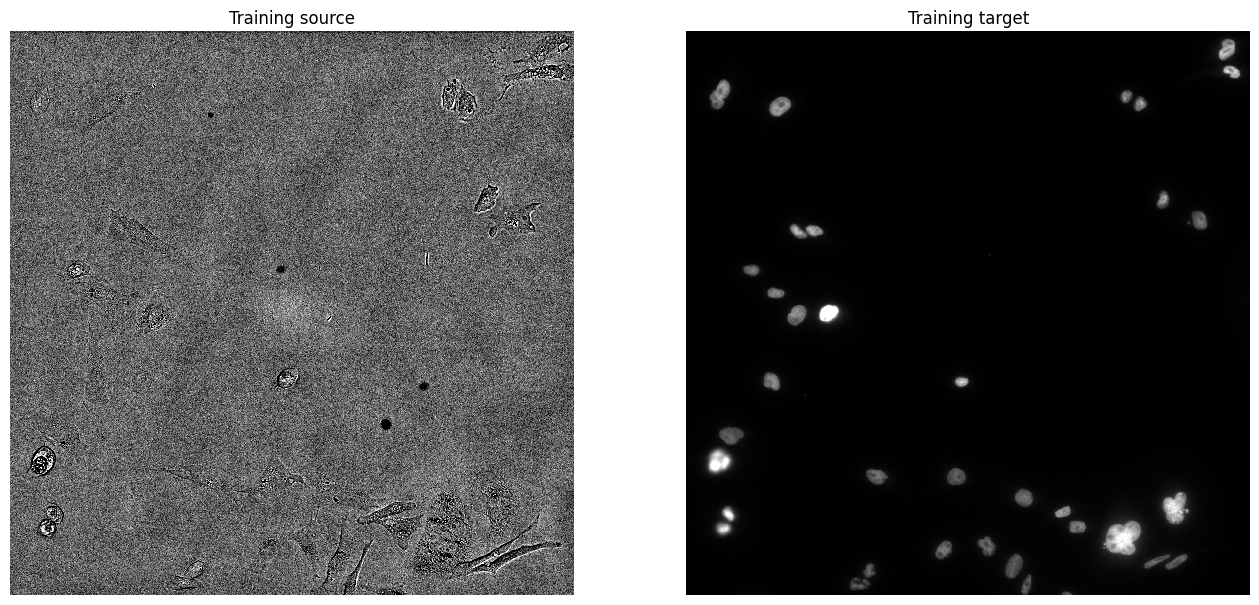

In [5]:
import cv2

#@markdown ###Path to training images:

Training_source = "/home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/DATA/MARIO/MERGED-CLEAN/CHO/train/ph_norm//" #@param {type:"string"}
#InputFile = Training_source+"/*.png"

Training_target = "/home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/DATA/MARIO/MERGED-CLEAN/CHO/train/nuclei/" #@param {type:"string"}
#OutputFile = Training_target+"/*.png"

#@markdown ###Type of images:

number_channels = "1" #@param ["1", "3"]

#@markdown ###Image normalisation:

Normalisation_training_source = "Contrast stretching" #@param ["None", "Contrast stretching", "Adaptive Equalization"]
Normalisation_training_target = "Contrast stretching" #@param ["None", "Contrast stretching", "Adaptive Equalization"]

# model name and path
#@markdown ###Name of the model and path to model folder:
model_name = "pix2pix_cho_selectedz_nuclei_ph_contrast_resized1024_finetune18012024_22012024" #@param {type:"string"}
model_path = "/home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/PIX2PIX-MODELS" #@param {type:"string"}
# pix2pix_working_directory = os.getcwd()
# other parameters for training.
#@markdown ###Training Parameters
#@markdown Number of epochs:
number_of_epochs =  3000#@param {type:"number"}

#@markdown ###Advanced Parameters

Use_Default_Advanced_Parameters = False #@param {type:"boolean"}
#@markdown ###If not, please input:
patch_size =  512#@param {type:"number"} # in pixels
batch_size =  5#@param {type:"number"}
initial_learning_rate = 0.001 #@param {type:"number"}


if (Use_Default_Advanced_Parameters):
    print("Default advanced parameters enabled")
    batch_size = 1
    patch_size =  512
    initial_learning_rate = 0.0002

#To use pix2pix we need to organise the data in a way the network can understand

Saving_path= os.path.join(pix2pix_working_directory, model_name)

if os.path.exists(Saving_path):
    shutil.rmtree(Saving_path)
os.makedirs(Saving_path)

imageA_folder = Saving_path+"/A"
os.makedirs(imageA_folder)

imageB_folder = Saving_path+"/B"
os.makedirs(imageB_folder)

imageAB_folder = Saving_path+"/AB"
os.makedirs(imageAB_folder)

TrainA_Folder = Saving_path+"/A/train"
os.makedirs(TrainA_Folder)

TrainB_Folder = Saving_path+"/B/train"
os.makedirs(TrainB_Folder)

# Here we disable pre-trained model by default (in case the  cell is not ran)
Use_pretrained_model = False

# Here we disable data augmentation by default (in case the cell is not ran)

Use_Data_augmentation = False

# Here we normalise the image is enabled

if Normalisation_training_source == "Contrast stretching":
    Training_source_norm = Saving_path+"/Training_source_norm"
    os.makedirs(Training_source_norm)
    Training_source_list = [f for f in os.listdir(Training_source) if not f.__contains__(".ipynb_checkpoints")]
    for filename in Training_source_list:
        img = io.imread(os.path.join(Training_source,filename)).astype(np.float32)
        short_name = os.path.splitext(filename)
        p2, p99 = np.percentile(img, (1, 99.9))
        img = exposure.rescale_intensity(img, in_range=(p2, p99))
        img = 255 * img # Now scale by 255
        img = img.astype(np.uint8)
        cv2.imwrite(Training_source_norm+"/"+short_name[0]+".png", img)
    Training_source = Training_source_norm

if Normalisation_training_target == "Contrast stretching":
    Training_target_norm = Saving_path+"/Training_target_norm"
    os.makedirs(Training_target_norm)
    Training_target_list = [f for f in os.listdir(Training_target) if not f.__contains__(".ipynb_checkpoints")]
    for filename in Training_target_list:
        img = io.imread(os.path.join(Training_target,filename)).astype(np.float32)
        short_name = os.path.splitext(filename)
        p2, p99 = np.percentile(img, (1, 99.9))
        img = exposure.rescale_intensity(img, in_range=(p2, p99))
        img = 255 * img # Now scale by 255
        img = img.astype(np.uint8)
        cv2.imwrite(Training_target_norm+"/"+short_name[0]+".png", img)
    Training_target = Training_target_norm

if Normalisation_training_source == "Adaptive Equalization":
    Training_source_norm = Saving_path+"/Training_source_norm"
    os.makedirs(Training_source_norm)
    Training_source_list = [f for f in os.listdir(Training_source) if not f.__contains__(".ipynb_checkpoints")]
    for filename in Training_source_list:
        img = io.imread(os.path.join(Training_source,filename))
        short_name = os.path.splitext(filename)
        img = exposure.equalize_adapthist(img, clip_limit=0.03)
        img = 255 * img # Now scale by 255
        img = img.astype(np.uint8)
        cv2.imwrite(Training_source_norm+"/"+short_name[0]+".png", img)
    Training_source = Training_source_norm

if Normalisation_training_target == "Adaptive Equalization":
    Training_target_norm = Saving_path+"/Training_target_norm"
    os.makedirs(Training_target_norm)
    Training_target_list = [f for f in os.listdir(Training_target) if not f.__contains__(".ipynb_checkpoints")]
    for filename in Training_target_list:
        img = io.imread(os.path.join(Training_target,filename))
        short_name = os.path.splitext(filename)
        img = exposure.equalize_adapthist(img, clip_limit=0.03)
        img = 255 * img # Now scale by 255
        img = img.astype(np.uint8)
        cv2.imwrite(Training_target_norm+"/"+short_name[0]+".png", img)
    Training_target = Training_target_norm

if Normalisation_training_source == "None":
    Training_source_norm = Saving_path+"/Training_source_norm"
    os.makedirs(Training_source_norm)
    Training_source_list = [f for f in os.listdir(Training_source) if not f.__contains__(".ipynb_checkpoints")]
    for filename in Training_source_list:
        img = io.imread(os.path.join(Training_source,filename))
        short_name = os.path.splitext(filename)
        cv2.imwrite(Training_source_norm+"/"+short_name[0]+".png", img)
    Training_source = Training_source_norm

if Normalisation_training_target == "None":
    Training_target_norm = Saving_path+"/Training_target_norm"
    os.makedirs(Training_target_norm)
    Training_target_list = [f for f in os.listdir(Training_target) if not f.__contains__(".ipynb_checkpoints")]
    for filename in Training_target_list:
        img = io.imread(os.path.join(Training_target,filename))
        short_name = os.path.splitext(filename)
        cv2.imwrite(Training_target_norm+"/"+short_name[0]+".png", img)
    Training_target = Training_target_norm


# This will display a randomly chosen dataset input and output
random_choice = random.choice(os.listdir(Training_source))
x = io.imread(Training_source+"/"+random_choice)

#Find image XY dimension
Image_Y = x.shape[0]
Image_X = x.shape[1]

Image_min_dim = min(Image_Y, Image_X)

if not Image_min_dim % 256 == 0:
    resize_factor = ((int(Image_min_dim / 256)) * 256)/Image_min_dim
    Image_min_dim = ((int(Image_min_dim / 256)) * 256)
    print (f" Your image dimensions are not divisible by 256; therefore the images will be resized by a factor of {resize_factor} to a shape of {Image_min_dim}")


#Hyperparameters failsafes
if patch_size > min(Image_Y, Image_X):
    patch_size = min(Image_Y, Image_X)
    print (bcolors.WARNING + " Your chosen patch_size is bigger than the xy dimension of your image; therefore the patch_size chosen is now:",patch_size)

# Here we check that patch_size is divisible by 4
if not patch_size % 4 == 0:
    patch_size = ((int(patch_size / 4)-1) * 4)
    print (bcolors.WARNING + " Your chosen patch_size is not divisible by 4; therefore the patch_size chosen is now:",patch_size)

# Here we check that patch_size is at least bigger than 256
if patch_size < 256:
    patch_size = 256
    print (bcolors.WARNING + " Your chosen patch_size is too small; therefore the patch_size chosen is now:",patch_size)

y = io.imread(Training_target+"/"+random_choice)

n_channel_x = 1 if x.ndim == 2 else x.shape[-1]
n_channel_y = 1 if y.ndim == 2 else y.shape[-1]

if n_channel_x == 1:
    cmap_x = 'gray'
else:
    cmap_x = None

if n_channel_y == 1:
    cmap_y = 'gray'
else:
    cmap_y = None

f=plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(x, cmap=cmap_x, interpolation='nearest')
plt.title('Training source')
plt.axis('off');

plt.subplot(1,2,2)
plt.imshow(y, cmap=cmap_y, interpolation='nearest')
plt.title('Training target')
plt.axis('off');

plt.savefig(os.path.join(Saving_path, 'TrainingDataExample_pix2pix.png'),bbox_inches='tight',pad_inches=0)

## **3.2. Data augmentation**
---
<font size = 4>

<font size = 4>Data augmentation can improve training progress by amplifying differences in the dataset. This can be useful if the available dataset is small since, in this case, it is possible that a network could quickly learn every example in the dataset (overfitting), without augmentation. Augmentation is not necessary for training and if your training dataset is large you should disable it.

<font size = 4>Data augmentation is performed here by [Augmentor.](https://github.com/mdbloice/Augmentor)

<font size = 4>[Augmentor](https://github.com/mdbloice/Augmentor) was described in the following article:

<font size = 4>Marcus D Bloice, Peter M Roth, Andreas Holzinger, Biomedical image augmentation using Augmentor, Bioinformatics, https://doi.org/10.1093/bioinformatics/btz259

<font size = 4>**Please also cite this original paper when publishing results obtained using this notebook with augmentation enabled.**

In [6]:
#Data augmentation

Use_Data_augmentation = True #@param {type:"boolean"}

if Use_Data_augmentation:
    !pip install Augmentor
    import Augmentor


#@markdown ####Choose a factor by which you want to multiply your original dataset

Multiply_dataset_by = 2 #@param {type:"slider", min:1, max:30, step:1}

Save_augmented_images = True #@param {type:"boolean"}

Saving_path = "/home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/PIX2PIX-MODELS/working_dir/" #@param {type:"string"}
Saving_path = os.path.join(Saving_path, model_name)

Use_Default_Augmentation_Parameters = True #@param {type:"boolean"}
#@markdown ###If not, please choose the probability of the following image manipulations to be used to augment your dataset (1 = always used; 0 = disabled ):

#@markdown ####Mirror and rotate images
rotate_90_degrees = 0 #@param {type:"slider", min:0, max:1, step:0.1}

rotate_270_degrees = 0 #@param {type:"slider", min:0, max:1, step:0.1}

flip_left_right = 0 #@param {type:"slider", min:0, max:1, step:0.1}

flip_top_bottom = 0 #@param {type:"slider", min:0, max:1, step:0.1}

#@markdown ####Random image Zoom

random_zoom = 0 #@param {type:"slider", min:0, max:1, step:0.1}

random_zoom_magnification = 0 #@param {type:"slider", min:0, max:1, step:0.1}

#@markdown ####Random image distortion

random_distortion = 0 #@param {type:"slider", min:0, max:1, step:0.1}


#@markdown ####Image shearing and skewing

image_shear = 0 #@param {type:"slider", min:0, max:1, step:0.1}
max_image_shear = 10 #@param {type:"slider", min:1, max:25, step:1}

skew_image = 0 #@param {type:"slider", min:0, max:1, step:0.1}

skew_image_magnitude = 0 #@param {type:"slider", min:0, max:1, step:0.1}


if Use_Default_Augmentation_Parameters:
    rotate_90_degrees = 0.5
    rotate_270_degrees = 0.5
    flip_left_right = 0.5
    flip_top_bottom = 0.5

    if not Multiply_dataset_by >5:
        random_zoom = 0
        random_zoom_magnification = 0.9
        random_distortion = 0
        image_shear = 0
        max_image_shear = 10
        skew_image = 0
        skew_image_magnitude = 0

    if Multiply_dataset_by >5:
        random_zoom = 0.1
        random_zoom_magnification = 0.9
        random_distortion = 0.5
        image_shear = 0.2
        max_image_shear = 5
        skew_image = 0.2
        skew_image_magnitude = 0.4

    if Multiply_dataset_by >25:
        random_zoom = 0.5
        random_zoom_magnification = 0.8
        random_distortion = 0.5
        image_shear = 0.5
        max_image_shear = 20
        skew_image = 0.5
        skew_image_magnitude = 0.6


list_files = os.listdir(Training_source)
Nb_files = len(list_files)

Nb_augmented_files = (Nb_files * Multiply_dataset_by)


if Use_Data_augmentation:
    print("Data augmentation enabled")
# Here we set the path for the various folder were the augmented images will be loaded

# All images are first saved into the augmented folder
  #Augmented_folder = "/content/Augmented_Folder"

    if not Save_augmented_images:
        Saving_path= pix2pix_working_directory

    Augmented_folder =  Saving_path+"/Augmented_Folder"
    if os.path.exists(Augmented_folder):
        shutil.rmtree(Augmented_folder)
    os.makedirs(Augmented_folder)

    #Training_source_augmented = "/content/Training_source_augmented"
    Training_source_augmented = Saving_path+"/Training_source_augmented"

    if os.path.exists(Training_source_augmented):
        shutil.rmtree(Training_source_augmented)
    os.makedirs(Training_source_augmented)

    #Training_target_augmented = "/content/Training_target_augmented"
    Training_target_augmented = Saving_path+"/Training_target_augmented"

    if os.path.exists(Training_target_augmented):
        shutil.rmtree(Training_target_augmented)
    os.makedirs(Training_target_augmented)


# Here we generate the augmented images
#Load the images
    p = Augmentor.Pipeline(Training_source, Augmented_folder)

#Define the matching images
    p.ground_truth(Training_target)
#Define the augmentation possibilities
    if not rotate_90_degrees == 0:
        p.rotate90(probability=rotate_90_degrees)

    if not rotate_270_degrees == 0:
        p.rotate270(probability=rotate_270_degrees)

    if not flip_left_right == 0:
        p.flip_left_right(probability=flip_left_right)

    if not flip_top_bottom == 0:
        p.flip_top_bottom(probability=flip_top_bottom)

    if not random_zoom == 0:
        p.zoom_random(probability=random_zoom, percentage_area=random_zoom_magnification)

    if not random_distortion == 0:
        p.random_distortion(probability=random_distortion, grid_width=4, grid_height=4, magnitude=8)

    if not image_shear == 0:
        p.shear(probability=image_shear,max_shear_left=20,max_shear_right=20)

    if not skew_image == 0:
        p.skew(probability=skew_image,magnitude=skew_image_magnitude)

    p.sample(int(Nb_augmented_files))

    print(int(Nb_augmented_files),"matching images generated")

# Here we sort through the images and move them back to augmented trainning source and targets folders

    augmented_files = os.listdir(Augmented_folder)

    for f in augmented_files:

        if (f.startswith("_groundtruth_(1)_")):
            shortname_noprefix = f[17:]
            shutil.copyfile(Augmented_folder+"/"+f, Training_target_augmented+"/"+shortname_noprefix)
        if not (f.startswith("_groundtruth_(1)_")):
            shutil.copyfile(Augmented_folder+"/"+f, Training_source_augmented+"/"+f)


    for filename in os.listdir(Training_source_augmented):
        # TODO: remove this chdir
        os.chdir(Training_source_augmented)
        os.rename(filename, filename.replace('_original', ''))

    #Here we clean up the extra files
    shutil.rmtree(Augmented_folder)

if not Use_Data_augmentation:
    print(bcolors.WARNING+"Data augmentation disabled")




Data augmentation enabled
Initialised with 400 image(s) found.
Output directory set to /home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/PIX2PIX-MODELS/working_dir/pix2pix_cho_selectedz_nuclei_ph_contrast_resized1024_finetune18012024_22012024/Augmented_Folder.

400 ground truth image(s) found.


Processing <PIL.Image.Image image mode=L size=1200x1200 at 0x7F86306C2920>: 100%|████████████████████████████| 800/800 [00:06<00:00, 123.30 Samples/s]


800 matching images generated



## **3.3. Using weights from a pre-trained model as initial weights**
---
<font size = 4>  Here, you can set the the path to a pre-trained model from which the weights can be extracted and used as a starting point for this training session. **This pre-trained model needs to be a pix2pix model**.

<font size = 4> This option allows you to perform training over multiple Colab runtimes or to do transfer learning using models trained outside of ZeroCostDL4Mic. **You do not need to run this section if you want to train a network from scratch**.


In [7]:
# @markdown ##Loading weights from a pre-trained network


Use_pretrained_model = True #@param {type:"boolean"}


#@markdown ###If yes, please provide the path to the model folder:
pretrained_model_path = "/home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/PIX2PIX-MODELS/pix2pix_cho_selectedz_nuclei_ph_contrast_resized1024_18012024" #@param {type:"string"}

# --------------------- Check if we load a previously trained model ------------------------
if Use_pretrained_model:
    h5_file_path = os.path.join(pretrained_model_path, "latest_net_G.pth")
    # --------------------- Check the model exist ------------------------

    if not os.path.exists(h5_file_path):
        print(bcolors.WARNING+'WARNING: Pretrained model does not exist')
        Use_pretrained_model = False
        print(bcolors.WARNING+'No pretrained network will be used.')

    if os.path.exists(h5_file_path):
        print("Pretrained model "+os.path.basename(pretrained_model_path)+" was found and will be loaded prior to training.")
else:
    print(bcolors.WARNING+'No pretrained network will be used.')



Pretrained model pix2pix_cho_selectedz_nuclei_ph_contrast_resized1024_18012024 was found and will be loaded prior to training.


# **4. Train the network**
---

## **4.1. Prepare the training data for training**
---
<font size = 4>Here, we use the information from Section 3 to prepare the training data into a suitable format for training. **Your data will be copied in the google Colab "content" folder which may take some time depending on the size of your dataset.**





In [8]:
#@markdown ##Prepare the data for training


# --------------------- Here we load the augmented data or the raw data ------------------------

if Use_Data_augmentation:
    Training_source_dir = Training_source_augmented
    Training_target_dir = Training_target_augmented

if not Use_Data_augmentation:
    Training_source_dir = Training_source
    Training_target_dir = Training_target
# --------------------- ------------------------------------------------

print("Data preparation in progress")

if os.path.exists(model_path+'/'+model_name):
    shutil.rmtree(model_path+'/'+model_name)
os.makedirs(model_path+'/'+model_name)

#--------------- Here we move the files to train A and train B ---------


print('Copying training source data...')
for f in tqdm(os.listdir(Training_source_dir)):
    shutil.copyfile(Training_source_dir+"/"+f, TrainA_Folder+"/"+f)

print('Copying training target data...')
for f in tqdm(os.listdir(Training_target_dir)):
    shutil.copyfile(Training_target_dir+"/"+f, TrainB_Folder+"/"+f)

#---------------------------------------------------------------------

#--------------- Here we combined A and B images---------
# TODO: check if we can remove this chdir
os.chdir(pix2pix_code_dir)
!python3 pytorch-CycleGAN-and-pix2pix/datasets/combine_A_and_B.py --fold_A "$imageA_folder" --fold_B "$imageB_folder" --fold_AB "$imageAB_folder"



# pix2pix uses EPOCH without lr decay and EPOCH with lr decay, here we automatically choose half and half

number_of_epochs_lr_stable = int(number_of_epochs/2)
number_of_epochs_lr_decay = int(number_of_epochs/2)

if Use_pretrained_model :
    for f in os.listdir(pretrained_model_path):
        if (f.startswith("latest_net_")):
            shutil.copyfile(pretrained_model_path+"/"+f, model_path+'/'+model_name+"/"+f)

#Export of pdf summary of training parameters
pdf_export(augmentation = Use_Data_augmentation, pretrained_model = Use_pretrained_model,
           Saving_path=os.path.join(pix2pix_working_directory, model_name))

print('------------------------')
print("Data ready for training")


Data preparation in progress
Copying training source data...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 800/800 [00:02<00:00, 310.01it/s]


Copying training target data...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 800/800 [00:00<00:00, 1057.33it/s]


[fold_A] =  /home/ocb/HardDrive_4TB/EGM/PHX/PhotoFITT/notebooks/deep-learning/pix2pix/pytorch-CycleGAN-and-pix2pix/pix2pix_cho_selectedz_nuclei_ph_contrast_resized1024_finetune18012024_22012024/A
[fold_B] =  /home/ocb/HardDrive_4TB/EGM/PHX/PhotoFITT/notebooks/deep-learning/pix2pix/pytorch-CycleGAN-and-pix2pix/pix2pix_cho_selectedz_nuclei_ph_contrast_resized1024_finetune18012024_22012024/B
[fold_AB] =  /home/ocb/HardDrive_4TB/EGM/PHX/PhotoFITT/notebooks/deep-learning/pix2pix/pytorch-CycleGAN-and-pix2pix/pix2pix_cho_selectedz_nuclei_ph_contrast_resized1024_finetune18012024_22012024/AB
[num_imgs] =  1000000
[use_AB] =  False
[no_multiprocessing] =  False
split = train, use 800/800 images
split = train, number of images = 800


Ignoring width="50%" specified on a <td> that is not in the first <tr>
Ignoring width="50%" specified on a <td> that is not in the first <tr>
Ignoring width="50%" specified on a <td> that is not in the first <tr>
Ignoring width="50%" specified on a <td> that is not in the first <tr>
Ignoring width="50%" specified on a <td> that is not in the first <tr>
Ignoring width="50%" specified on a <td> that is not in the first <tr>
Ignoring width="50%" specified on a <td> that is not in the first <tr>
Ignoring width="50%" specified on a <td> that is not in the first <tr>


------------------------
Data ready for training


## **4.2. Start Training**
---
<font size = 4>When playing the cell below you should see updates after each epoch (round). Network training can take some time.

<font size = 4>* **CRITICAL NOTE:** Google Colab has a time limit for processing (to prevent using GPU power for datamining). Training time must be less than 12 hours! If training takes longer than 12 hours, please decrease the number of epochs or number of patches or continue the training in a second Colab session. **Pix2pix will save model checkpoints every 5 epochs.**

<font size = 4>Once training is complete, the trained model is automatically saved on your Google Drive, in the **model_path** folder that was selected in Section 3. It is however wise to download the folder as all data can be erased at the next training if using the same folder.

In [ ]:
#@markdown ##Start training

# get number of channels
if number_channels == "1":
    nc = 1
elif number_channels == "3":
    nc = 3

start = time.time()

#--------------------------------- Command line inputs to change pix2pix paramaters------------

       # basic parameters
        #('--dataroot', required=True, help='path to images (should have subfolders trainA, trainB, valA, valB, etc)')
        #('--name', type=str, default='experiment_name', help='name of the experiment. It decides where to store samples and models')
        #('--gpu_ids', type=str, default='0', help='gpu ids: e.g. 0  0,1,2, 0,2. use -1 for CPU')
        #('--checkpoints_dir', type=str, default='./checkpoints', help='models are saved here')

       # model parameters
        #('--model', type=str, default='cycle_gan', help='chooses which model to use. [cycle_gan | pix2pix | test | colorization]')
        #('--input_nc', type=int, default=3, help='# of input image channels: 3 for RGB and 1 for grayscale')
        #('--output_nc', type=int, default=3, help='# of output image channels: 3 for RGB and 1 for grayscale')
        #('--ngf', type=int, default=64, help='# of gen filters in the last conv layer')
        #('--ndf', type=int, default=64, help='# of discrim filters in the first conv layer')
        #('--netD', type=str, default='basic', help='specify discriminator architecture [basic | n_layers | pixel]. The basic model is a 70x70 PatchGAN. n_layers allows you to specify the layers in the discriminator')
        #('--netG', type=str, default='resnet_9blocks', help='specify generator architecture [resnet_9blocks | resnet_6blocks | unet_256 | unet_128]')
        #('--n_layers_D', type=int, default=3, help='only used if netD==n_layers')
        #('--norm', type=str, default='instance', help='instance normalization or batch normalization [instance | batch | none]')
        #('--init_type', type=str, default='normal', help='network initialization [normal | xavier | kaiming | orthogonal]')
        #('--init_gain', type=float, default=0.02, help='scaling factor for normal, xavier and orthogonal.')
        #('--no_dropout', action='store_true', help='no dropout for the generator')

       # dataset parameters
        #('--dataset_mode', type=str, default='unaligned', help='chooses how datasets are loaded. [unaligned | aligned | single | colorization]')
        #('--direction', type=str, default='AtoB', help='AtoB or BtoA')
        #('--serial_batches', action='store_true', help='if true, takes images in order to make batches, otherwise takes them randomly')
        #('--num_threads', default=4, type=int, help='# threads for loading data')
        #('--batch_size', type=int, default=1, help='input batch size')
        #('--load_size', type=int, default=286, help='scale images to this size')
        #('--crop_size', type=int, default=256, help='then crop to this size')
        #('--max_dataset_size', type=int, default=float("inf"), help='Maximum number of samples allowed per dataset. If the dataset directory contains more than max_dataset_size, only a subset is loaded.')
        #('--preprocess', type=str, default='resize_and_crop', help='scaling and cropping of images at load time [resize_and_crop | crop | scale_width | scale_width_and_crop | none]')
        #('--no_flip', action='store_true', help='if specified, do not flip the images for data augmentation')
        #('--display_winsize', type=int, default=256, help='display window size for both visdom and HTML')

       # additional parameters
        #('--epoch', type=str, default='latest', help='which epoch to load? set to latest to use latest cached model')
        #('--load_iter', type=int, default='0', help='which iteration to load? if load_iter > 0, the code will load models by iter_[load_iter]; otherwise, the code will load models by [epoch]')
        #('--verbose', action='store_true', help='if specified, print more debugging information')
        #('--suffix', default='', type=str, help='customized suffix: opt.name = opt.name + suffix: e.g., {model}_{netG}_size{load_size}')

       # visdom and HTML visualization parameters
        #('--display_freq', type=int, default=400, help='frequency of showing training results on screen')
        #('--display_ncols', type=int, default=4, help='if positive, display all images in a single visdom web panel with certain number of images per row.')
        #('--display_id', type=int, default=1, help='window id of the web display')
        #('--display_server', type=str, default="http://localhost", help='visdom server of the web display')
        #('--display_env', type=str, default='main', help='visdom display environment name (default is "main")')
        #('--display_port', type=int, default=8097, help='visdom port of the web display')
        #('--update_html_freq', type=int, default=1000, help='frequency of saving training results to html')
        #('--print_freq', type=int, default=100, help='frequency of showing training results on console')
        #('--no_html', action='store_true', help='do not save intermediate training results to [opt.checkpoints_dir]/[opt.name]/web/')

       # network saving and loading parameters
        #('--save_latest_freq', type=int, default=5000, help='frequency of saving the latest results')
        #('--save_epoch_freq', type=int, default=5, help='frequency of saving checkpoints at the end of epochs')
        #('--save_by_iter', action='store_true', help='whether saves model by iteration')
        #('--continue_train', action='store_true', help='continue training: load the latest model')
        #('--epoch_count', type=int, default=1, help='the starting epoch count, we save the model by <epoch_count>, <epoch_count>+<save_latest_freq>, ...')
        #('--phase', type=str, default='train', help='train, val, test, etc')

       # training parameters
        #('--n_epochs', type=int, default=100, help='number of epochs with the initial learning rate')
        #('--n_epochs_decay', type=int, default=100, help='number of epochs to linearly decay learning rate to zero')
        #('--beta1', type=float, default=0.5, help='momentum term of adam')
        #('--lr', type=float, default=0.0002, help='initial learning rate for adam')
        #('--gan_mode', type=str, default='lsgan', help='the type of GAN objective. [vanilla| lsgan | wgangp]. vanilla GAN loss is the cross-entropy objective used in the original GAN paper.')
        #('--pool_size', type=int, default=50, help='the size of image buffer that stores previously generated images')
        #('--lr_policy', type=str, default='linear', help='learning rate policy. [linear | step | plateau | cosine]')
        #('--lr_decay_iters', type=int, default=50, help='multiply by a gamma every lr_decay_iters iterations'

#---------------------------------------------------------
number_of_epochs_lr_stable = 100
number_of_epochs_lr_decay = 1000
#----- Start the training ------------------------------------
if not Use_pretrained_model:
    !python3 pytorch-CycleGAN-and-pix2pix/train.py --dataroot "$imageAB_folder" --name $model_name --model pix2pix --batch_size $batch_size --preprocess scale_width_and_crop --load_size $Image_min_dim --crop_size $patch_size --checkpoints_dir "$model_path"  --no_html --n_epochs $number_of_epochs_lr_stable --n_epochs_decay $number_of_epochs_lr_decay --lr $initial_learning_rate --lr_policy "linear" --display_id 0 --save_epoch_freq 5 --input_nc "$nc" --output_nc "$nc" --dataset_mode "aligned"

if Use_pretrained_model:
    !python3 pytorch-CycleGAN-and-pix2pix/train.py --dataroot "$imageAB_folder" --name $model_name --model pix2pix --batch_size $batch_size --preprocess scale_width_and_crop --load_size $Image_min_dim --crop_size $patch_size --checkpoints_dir "$model_path"  --no_html --n_epochs $number_of_epochs_lr_stable --n_epochs_decay $number_of_epochs_lr_decay --lr $initial_learning_rate --lr_policy "linear" --display_id 0 --save_epoch_freq 5 --continue_train --input_nc "$nc" --output_nc "$nc" --dataset_mode "aligned"


#---------------------------------------------------------

print("Training, done.")

# Displaying the time elapsed for training
dt = time.time() - start
mins, sec = divmod(dt, 60)
hour, mins = divmod(mins, 60)
print("Time elapsed:",hour, "hour(s)",mins,"min(s)",round(sec),"sec(s)")

# Export pdf summary after training to update document
pdf_export(trained = True, augmentation = Use_Data_augmentation, pretrained_model = Use_pretrained_model,
           Saving_path=os.path.join(pix2pix_working_directory, model_name))


----------------- Options ---------------
               batch_size: 5                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: /home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/PIX2PIX-MODELS	[default: ./checkpoints]
           continue_train: True                          	[default: False]
                crop_size: 512                           	[default: 256]
                 dataroot: /home/ocb/HardDrive_4TB/EGM/PHX/PhotoFITT/notebooks/deep-learning/pix2pix/pytorch-CycleGAN-and-pix2pix/pix2pix_cho_selectedz_nuclei_ph_contrast_resized1024_finetune18012024_22012024/AB	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 0                             	[default: 1]
            display_ncols: 4              

# **5. Evaluate your model**
---

<font size = 4>This section allows the user to perform important quality checks on the validity and generalisability of the trained model.

<font size = 4>**We highly recommend to perform quality control on all newly trained models.**



## **5.1. Choose the model you want to assess**

In [18]:
# model name and path
#@markdown ###Do you want to assess the model you just trained ?
Use_the_current_trained_model = False #@param {type:"boolean"}

#@markdown ###If not, please provide the path to the model folder:
# model name and path
#@markdown ###Name of the model and path to model folder:
QC_model_folder = "/home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/PIX2PIX-MODELS/pix2pix_cho_selectedz_nuclei_ph_contrast_resized1024_finetune18012024_22012024" #@param {type:"string"}

#Here we define the loaded model name and path
QC_model_name = os.path.basename(QC_model_folder)
QC_model_path = os.path.dirname(QC_model_folder)

if (Use_the_current_trained_model):
    QC_model_name = model_name
    QC_model_path = model_path
#else:
#    pix2pix_working_directory = os.getcwd()

full_QC_model_path = QC_model_path+'/'+QC_model_name+'/'
if os.path.exists(full_QC_model_path):
    print("The "+QC_model_name+" network will be evaluated")
else:
    W  = '\033[0m'  # white (normal)
    R  = '\033[31m' # red
    print(R+'!! WARNING: The chosen model does not exist !!'+W)
    print('Please make sure you provide a valid model path and model name before proceeding further.')


The pix2pix_cho_selectedz_nuclei_ph_contrast_resized1024_finetune18012024_22012024 network will be evaluated


## **5.2. Identify the best checkpoint to use to make predictions**

<font size = 4> Pix2pix save model checkpoints every five epochs. Due to the stochastic nature of GAN networks, the last checkpoint is not always the best one to use. As a consequence, it can be challenging to choose the most suitable checkpoint to use to make predictions.

<font size = 4>This section allows you to perform predictions using all the saved checkpoints and to estimate the quality of these predictions by comparing them to the provided ground truths images. Metric used include:

<font size = 4>**1. The SSIM (structural similarity) map**

<font size = 4>The SSIM metric is used to evaluate whether two images contain the same structures. It is a normalized metric and an SSIM of 1 indicates a perfect similarity between two images. Therefore for SSIM, the closer to 1, the better. The SSIM maps are constructed by calculating the SSIM metric in each pixel by considering the surrounding structural similarity in the neighbourhood of that pixel (currently defined as window of 11 pixels and with Gaussian weighting of 1.5 pixel standard deviation, see our Wiki for more info).

<font size=4>**mSSIM** is the SSIM value calculated across the entire window of both images.

<font size=4>**The output below shows the SSIM maps with the mSSIM**

<font size = 4>**2. The RSE (Root Squared Error) map**

<font size = 4>This is a display of the root of the squared difference between the normalized predicted and target or the source and the target. In this case, a smaller RSE is better. A perfect agreement between target and prediction will lead to an RSE map showing zeros everywhere (dark).


<font size =4>**NRMSE (normalised root mean squared error)** gives the average difference between all pixels in the images compared to each other. Good agreement yields low NRMSE scores.

<font size = 4>**PSNR (Peak signal-to-noise ratio)** is a metric that gives the difference between the ground truth and prediction (or source input) in decibels, using the peak pixel values of the prediction and the MSE between the images. The higher the score the better the agreement.

<font size=4>**The output below shows the RSE maps with the NRMSE and PSNR values.**



In [19]:
#@markdown ##Choose the folders that contain your Quality Control dataset
#@markdown ###Path to images:
Source_QC_folder = "/home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/DATA/MARIO/MERGED-CLEAN/CHO/test/ph_norm/"  #@param{type:"string"}
Target_QC_folder = "/home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/DATA/MARIO/MERGED-CLEAN/CHO/test/nuclei/" #@param{type:"string"}

#@markdown ###Do you need to prepare test data again?
prepare_testdata = True #@param {type:"boolean"}
#@markdown If not, provide the path containing the images, e.g., "/content/my_model_images/QC"
path2im = ''#@param{type:"string"}

#@markdown ###Number of channels:

number_channels = "1" #@param ["1", "3"]

# get number of channels
if number_channels == "1":
    nc = 1
elif number_channels == "3":
    nc = 3

#@markdown ###Image normalisation:
Normalisation_QC_source = "Contrast stretching" #@param ["None", "Contrast stretching", "Adaptive Equalization"]
Normalisation_QC_target = "Contrast stretching" #@param ["None", "Contrast stretching", "Adaptive Equalization"]

#@markdown ###Did you evaluate all the checkpoints and only want to visualise the results? (It reduces significantly the processing time if you did it already)
avoid_evaluating_again = False #@param {type:"boolean"}
#@markdown ####Choose the frequency of checkpoints to evaluate. If 1, it will evaluate all the model checkpoints available.
QC_evaluation_checkpoint_freq = 4  #@param {type:"number"}
QC_freq = int(QC_evaluation_checkpoint_freq)

#@markdown ###Advanced Parameters
patch_size_QC =  1200#@param {type:"number"} # in pixels
Do_lpips_analysis = True #@param {type:"boolean"}



if not avoid_evaluating_again:
  # Create a quality control folder
  if os.path.exists(os.path.join(QC_model_path, QC_model_name, "Quality Control")):
      shutil.rmtree(os.path.join(QC_model_path, QC_model_name, "Quality Control"))
  os.makedirs(os.path.join(QC_model_path, QC_model_name, "Quality Control"), exist_ok=True)

# Create a quality control/Prediction Folder
if prepare_testdata or not avoid_evaluating_again:
    QC_prediction_results, path2im = prepare_qc_dir(QC_model_path, QC_model_name, pix2pix_working_directory)
else:
    QC_prediction_results = os.path.join(QC_model_path, QC_model_name, "Quality Control", "Prediction")

if not avoid_evaluating_again:

  print("-------------------------------------------------------------")
  print("Path where the predictions are stored")
  print(QC_prediction_results)
  print("Path where test images are prepared for testing")
  print(path2im)
  print("-------------------------------------------------------------")
  print("Preparing the test data. This can take some time...")

  # Here we count how many images are in our folder to be predicted and we had a few
  Nb_files_Data_folder = len(os.listdir(os.path.join(path2im, "A", "test")))
  #Nb_files_Data_folder = len(os.listdir(Source_QC_folder)) + 10

  # List images in Source_QC_folder

  #Here we copy and normalise the data
  if prepare_testdata:
      normalise_data(Source_QC_folder, Target_QC_folder, Normalisation_QC_source, Normalisation_QC_target, path2im)
  print("Done")
else:
  # Here we count how many images are in our folder to be predicted and we had a few
  Nb_files_Data_folder = len(os.listdir(Source_QC_folder))

-------------------------------------------------------------
Path where the predictions are stored
/home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/PIX2PIX-MODELS/pix2pix_cho_selectedz_nuclei_ph_contrast_resized1024_finetune18012024_22012024/Quality Control/Prediction
Path where test images are prepared for testing
/home/ocb/HardDrive_4TB/EGM/PHX/PhotoFITT/notebooks/deep-learning/pix2pix/pix2pix_cho_selectedz_nuclei_ph_contrast_resized1024_finetune18012024_22012024_images/QC
-------------------------------------------------------------
Preparing the test data. This can take some time...
Done


In [ ]:
#@markdown ##Run Quality Control
if not avoid_evaluating_again:
  # Here we count how many images are in our folder to be predicted and we had a few
  Nb_files_Data_folder = len(os.listdir(os.path.join(path2im, "A", "test")))
  #Nb_files_Data_folder = len(os.listdir(Source_QC_folder)) + 10

  # List images in Source_QC_folder
  #Here we create a merged folder containing only imageA
  # TODO: check if we can remove this chdir
  os.chdir(pix2pix_code_dir)
  imageA_folder = os.path.join(path2im, "A")
  imageB_folder = os.path.join(path2im, "B")
  imageAB_folder = os.path.join(path2im, "AB")
  !python3 pytorch-CycleGAN-and-pix2pix/datasets/combine_A_and_B.py --fold_A "$imageA_folder" --fold_B "$imageB_folder" --fold_AB "$imageAB_folder"

if not patch_size_QC % 256 == 0:
    patch_size_QC = ((int(patch_size_QC / 256)) * 256)
    print (" Your image dimensions are not divisible by 256; therefore your images have now been resized to:",patch_size_QC)

if patch_size_QC < 256:
    patch_size_QC = 256

# Nb_Checkpoint = len(glob.glob(os.path.join(full_QC_model_path, '*G.pth')))
Nb_Checkpoint = [int(s.split("_net_")[0]) for s in os.listdir(full_QC_model_path) if s.__contains__('G.pth') and not s.__contains__('latest')]
Nb_Checkpoint.sort()
Nb_Checkpoint.append("latest")

## Initiate lists
Checkpoint_list = []
Average_ssim_score_list = []
Average_lpips_score_list = []

for j in range(0, len(Nb_Checkpoint) + 1, QC_freq):
    if j >= len(Nb_Checkpoint):
        checkpoints = "latest"
    else:
        checkpoints = Nb_Checkpoint[j] # j*QC_freq

    #if checkpoints == len(Nb_Checkpoint): # Nb_Checkpoint*QC_freq:
    #    checkpoints = "latest"

    print("The checkpoint currently analysed is ="+str(checkpoints))

    Checkpoint_list.append(checkpoints)

    # Create a quality control/Prediction Folder
    QC_prediction_results = os.path.join(QC_model_path, QC_model_name, "Quality Control", str(checkpoints))
    if not avoid_evaluating_again:
      if os.path.exists(QC_prediction_results):
          shutil.rmtree(QC_prediction_results)
      os.makedirs(QC_prediction_results)

      #---------------------------- Predictions are performed here ----------------------
      !python3 pytorch-CycleGAN-and-pix2pix/test.py --dataroot "$imageAB_folder" --name "$QC_model_name" --model pix2pix --epoch "$checkpoints" --no_dropout --preprocess scale_width --load_size "$patch_size_QC" --crop_size "$patch_size_QC" --results_dir "$QC_prediction_results" --checkpoints_dir "$QC_model_path" --direction AtoB --num_test "$Nb_files_Data_folder" --input_nc "$nc" --output_nc "$nc" --dataset_mode "aligned"
      #-----------------------------------------------------------------------------------

      #Here we need to move the data again and remove all the unnecessary folders

      Checkpoint_name = "test_"+str(checkpoints)
      QC_results_images = os.path.join(QC_prediction_results, QC_model_name, Checkpoint_name, "images")
      QC_results_images_files = os.listdir(QC_results_images)

      for f in QC_results_images_files:
          shutil.copyfile(os.path.join(QC_results_images, f), os.path.join(QC_prediction_results, f))

      #Here we clean up the extra files
      shutil.rmtree(os.path.join(QC_prediction_results, QC_model_name))

  #-------------------------------- QC for RGB ------------------------------------
    if number_channels == "3":

        Average_SSIM_checkpoint, Average_lpips_checkpoint = QC_RGB(Source_QC_folder, QC_prediction_results)

        Average_ssim_score_list.append(Average_SSIM_checkpoint)
        Average_lpips_score_list.append(Average_lpips_checkpoint)
#------------------------------------------- QC for Grayscale ----------------------------------------------
    if number_channels == "1":
        Average_SSIM_checkpoint, Average_lpips_checkpoint = QC_singlechannel(Source_QC_folder, QC_prediction_results)
        Average_ssim_score_list.append(Average_SSIM_checkpoint)
        Average_lpips_score_list.append(Average_lpips_checkpoint)

        # All data is now processed saved
# -------------------------------- Display --------------------------------

# Display the IoV vs Checkpoint plot
plt.figure(figsize=(20,5))
plt.plot(Checkpoint_list, Average_ssim_score_list, label="SSIM")
plt.title('Checkpoints vs. SSIM')
plt.ylabel('SSIM')
plt.xlabel('Checkpoints')
plt.legend()
plt.savefig(os.path.join(full_QC_model_path,'Quality Control','SSIMvsCheckpoint_data.png'),bbox_inches='tight',pad_inches=0)
plt.show()


# -------------------------------- Display --------------------------------

if Do_lpips_analysis:
    # Display the lpips vs Checkpoint plot
    plt.figure(figsize=(20,5))
    plt.plot(Checkpoint_list, Average_lpips_score_list, label="lpips")
    plt.title('Checkpoints vs. lpips')
    plt.ylabel('lpips')
    plt.xlabel('Checkpoints')
    plt.legend()
    plt.savefig(os.path.join(full_QC_model_path,'Quality Control','lpipsvsCheckpoint_data.png'),bbox_inches='tight',pad_inches=0)
    plt.show()

# -------------------------------- Display RGB --------------------------------


from ipywidgets import interact
import ipywidgets as widgets
if number_channels == "3":
    @interact
    def show_results(file=os.listdir(Source_QC_folder), checkpoints=Checkpoint_list):

        random_choice_shortname_no_PNG = file[:-4]
        df1 = pd.read_csv(os.path.join(full_QC_model_path,'Quality Control', str(checkpoints),"QC_metrics_"+QC_model_name+str(checkpoints)+".csv"), header=0)
        df2 = df1.set_index("image #", drop = False)
        index_SSIM_GTvsPrediction = df2.loc[file, "Prediction v. GT mSSIM"]
        index_SSIM_GTvsSource = df2.loc[file, "Input v. GT mSSIM"]
        lpips_GTvsPrediction = df2.loc[file, "Prediction v. GT lpips"]
        lpips_GTvsSource = df2.loc[file, "Input v. GT lpips"]

        #Setting up colours
        cmap = None
        plt.figure(figsize=(15,15))

        # Target (Ground-truth)
        plt.subplot(3,3,1)
        plt.axis('off')
        img_GT = imageio.imread(os.path.join(full_QC_model_path,'Quality Control', str(checkpoints), random_choice_shortname_no_PNG+"_real_B.png"), as_gray=False, pilmode="RGB")
        plt.imshow(img_GT, cmap = cmap)
        plt.title('Target',fontsize=15)

        # Source
        plt.subplot(3,3,2)
        plt.axis('off')
        img_Source = imageio.imread(os.path.join(full_QC_model_path,'Quality Control', str(checkpoints), random_choice_shortname_no_PNG+"_real_A.png"), as_gray=False, pilmode="RGB")
        plt.imshow(img_Source, cmap = cmap)
        plt.title('Source',fontsize=15)

        # Prediction
        plt.subplot(3,3,3)
        plt.axis('off')
        img_Prediction = io.imread(os.path.join(full_QC_model_path,'Quality Control', str(checkpoints), random_choice_shortname_no_PNG+"_fake_B.png"))
        plt.imshow(img_Prediction, cmap = cmap)
        plt.title('Prediction',fontsize=15)

        # SSIM between GT and Source
        plt.subplot(3,3,5)
        # plt.axis('off')
        plt.tick_params(
                      axis='both',      # changes apply to the x-axis and y-axis
                      which='both',      # both major and minor ticks are affected
                      bottom=False,      # ticks along the bottom edge are off
                      top=False,        # ticks along the top edge are off
                      left=False,       # ticks along the left edge are off
                      right=False,         # ticks along the right edge are off
                      labelbottom=False,
                      labelleft=False)

        img_SSIM_GTvsSource = imageio.imread(os.path.join(full_QC_model_path,'Quality Control', str(checkpoints), "SSIM_GTvsSource_"+random_choice_shortname_no_PNG+".tif"))

        imSSIM_GTvsSource = plt.imshow(img_SSIM_GTvsSource, cmap = cmap, vmin=0, vmax=1)
        # plt.colorbar(imSSIM_GTvsSource,fraction=0.046, pad=0.04)
        plt.title('Target vs. Source',fontsize=15)
        plt.xlabel('mSSIM: '+str(round(index_SSIM_GTvsSource,3)),fontsize=14)
        plt.ylabel('SSIM maps',fontsize=20, rotation=0, labelpad=75)

        # SSIM between GT and Prediction
        plt.subplot(3,3,6)
        # plt.axis('off')
        plt.tick_params(
          axis='both',      # changes apply to the x-axis and y-axis
          which='both',      # both major and minor ticks are affected
          bottom=False,      # ticks along the bottom edge are off
          top=False,        # ticks along the top edge are off
          left=False,       # ticks along the left edge are off
          right=False,         # ticks along the right edge are off
          labelbottom=False,
          labelleft=False)

        img_SSIM_GTvsPrediction = imageio.imread(os.path.join(full_QC_model_path,'Quality Control', str(checkpoints), "SSIM_GTvsPrediction_"+random_choice_shortname_no_PNG+".tif"))

        imSSIM_GTvsPrediction = plt.imshow(img_SSIM_GTvsPrediction, cmap = cmap, vmin=0,vmax=1)
        # plt.colorbar(imSSIM_GTvsPrediction,fraction=0.046, pad=0.04)
        plt.title('Target vs. Prediction',fontsize=15)
        plt.xlabel('mSSIM: '+str(round(index_SSIM_GTvsPrediction,3)),fontsize=14)

        # lpips Error between GT and source

        if Do_lpips_analysis:
            plt.subplot(3,3,8)
            # plt.axis('off')
            plt.tick_params(
                            axis='both',      # changes apply to the x-axis and y-axis
                            which='both',      # both major and minor ticks are affected
                            bottom=False,      # ticks along the bottom edge are off
                            top=False,        # ticks along the top edge are off
                            left=False,       # ticks along the left edge are off
                            right=False,         # ticks along the right edge are off
                            labelbottom=False,
                            labelleft=False)

            img_lpips_GTvsSource = imageio.imread(os.path.join(full_QC_model_path,'Quality Control', str(checkpoints), "lpips_GTvsInput_"+random_choice_shortname_no_PNG+".tif"))

            imlpips_GTvsSource = plt.imshow(img_lpips_GTvsSource, cmap = cmap, vmin=0, vmax=1)
            plt.colorbar(imlpips_GTvsSource,fraction=0.046,pad=0.04)
            plt.title('Target vs. Source',fontsize=15)
            plt.xlabel('lpips: '+str(round(lpips_GTvsSource,3)),fontsize=14)
            plt.ylabel('Lpips maps',fontsize=20, rotation=0, labelpad=75)


            # lpips Error between GT and Prediction
            plt.subplot(3,3,9)
            # plt.axis('off')
            plt.tick_params(
                            axis='both',      # changes apply to the x-axis and y-axis
                            which='both',      # both major and minor ticks are affected
                            bottom=False,      # ticks along the bottom edge are off
                            top=False,        # ticks along the top edge are off
                            left=False,       # ticks along the left edge are off
                            right=False,         # ticks along the right edge are off
                            labelbottom=False,
                            labelleft=False)

            img_lpips_GTvsPrediction = imageio.imread(os.path.join(full_QC_model_path,'Quality Control', str(checkpoints), "lpips_GTvsPrediction_"+random_choice_shortname_no_PNG+".tif"))

            imlpips_GTvsPrediction = plt.imshow(img_lpips_GTvsPrediction, cmap = cmap, vmin=0, vmax=1)
            plt.colorbar(imlpips_GTvsPrediction,fraction=0.046,pad=0.04)
            plt.title('Target vs. Prediction',fontsize=15)
            plt.xlabel('lpips: '+str(round(lpips_GTvsPrediction,3)),fontsize=14)

        plt.savefig(os.path.join(full_QC_model_path, 'Quality Control', 'QC_example_data.png'),bbox_inches='tight',pad_inches=0)

# -------------------------------- Display Grayscale --------------------------------

if number_channels == "1":
    @interact
    def show_results(file=os.listdir(Source_QC_folder), checkpoints=Checkpoint_list):
        random_choice_shortname_no_PNG = file[:-4]

        df1 = pd.read_csv(os.path.join(full_QC_model_path,'Quality Control', str(checkpoints), "QC_metrics_"+QC_model_name+str(checkpoints)+".csv"), header=0)
        df2 = df1.set_index("image #", drop = False)
        index_SSIM_GTvsPrediction = df2.loc[file, "Prediction v. GT mSSIM"]
        index_SSIM_GTvsSource = df2.loc[file, "Input v. GT mSSIM"]

        NRMSE_GTvsPrediction = df2.loc[file, "Prediction v. GT NRMSE"]
        NRMSE_GTvsSource = df2.loc[file, "Input v. GT NRMSE"]
        PSNR_GTvsSource = df2.loc[file, "Input v. GT PSNR"]
        PSNR_GTvsPrediction = df2.loc[file, "Prediction v. GT PSNR"]
        lpips_GTvsPrediction = df2.loc[file, "Prediction v. GT lpips"]
        lpips_GTvsSource = df2.loc[file, "Input v. GT lpips"]

        plt.figure(figsize=(20,20))
        # Currently only displays the last computed set, from memory
        # Target (Ground-truth)
        plt.subplot(4,3,1)
        plt.axis('off')
        img_GT = imageio.imread(os.path.join(full_QC_model_path,'Quality Control', str(checkpoints), random_choice_shortname_no_PNG+"_real_B.png"))

        plt.imshow(img_GT, norm=simple_norm(img_GT, percent = 99))
        plt.title('Target',fontsize=15)

        # Source
        plt.subplot(4,3,2)
        plt.axis('off')
        img_Source = imageio.imread(os.path.join(full_QC_model_path,'Quality Control', str(checkpoints), random_choice_shortname_no_PNG+"_real_A.png"))
        plt.imshow(img_Source, norm=simple_norm(img_Source, percent = 99))
        plt.title('Source',fontsize=15)

        #Prediction
        plt.subplot(4,3,3)
        plt.axis('off')
        img_Prediction = io.imread(os.path.join(full_QC_model_path,'Quality Control', str(checkpoints), random_choice_shortname_no_PNG+"_fake_B.png"))
        plt.imshow(img_Prediction, norm=simple_norm(img_Prediction, percent = 99))
        plt.title('Prediction',fontsize=15)

        #Setting up colours
        cmap = plt.cm.CMRmap

        #SSIM between GT and Source
        plt.subplot(4,3,5)
        #plt.axis('off')
        plt.tick_params(
          axis='both',      # changes apply to the x-axis and y-axis
          which='both',      # both major and minor ticks are affected
          bottom=False,      # ticks along the bottom edge are off
          top=False,        # ticks along the top edge are off
          left=False,       # ticks along the left edge are off
          right=False,         # ticks along the right edge are off
          labelbottom=False,
          labelleft=False)

        img_SSIM_GTvsSource = imageio.imread(os.path.join(full_QC_model_path,'Quality Control', str(checkpoints), "SSIM_GTvsSource_"+random_choice_shortname_no_PNG+".tif"))
        img_SSIM_GTvsSource = img_SSIM_GTvsSource / 255
        imSSIM_GTvsSource = plt.imshow(img_SSIM_GTvsSource, cmap = cmap, vmin=0, vmax=1)

        plt.colorbar(imSSIM_GTvsSource,fraction=0.046, pad=0.04)
        plt.title('Target vs. Source',fontsize=15)
        plt.xlabel('mSSIM: '+str(round(index_SSIM_GTvsSource,3)),fontsize=14)
        plt.ylabel('SSIM maps',fontsize=20, rotation=0, labelpad=75)

        #SSIM between GT and Prediction
        plt.subplot(4,3,6)
        #plt.axis('off')
        plt.tick_params(
          axis='both',      # changes apply to the x-axis and y-axis
          which='both',      # both major and minor ticks are affected
          bottom=False,      # ticks along the bottom edge are off
          top=False,        # ticks along the top edge are off
          left=False,       # ticks along the left edge are off
          right=False,         # ticks along the right edge are off
          labelbottom=False,
          labelleft=False)

        img_SSIM_GTvsPrediction = imageio.imread(os.path.join(full_QC_model_path,'Quality Control', str(checkpoints), "SSIM_GTvsPrediction_"+random_choice_shortname_no_PNG+".tif"))
        img_SSIM_GTvsPrediction = img_SSIM_GTvsPrediction / 255
        imSSIM_GTvsPrediction = plt.imshow(img_SSIM_GTvsPrediction, cmap = cmap, vmin=0,vmax=1)

        plt.colorbar(imSSIM_GTvsPrediction,fraction=0.046, pad=0.04)
        plt.title('Target vs. Prediction',fontsize=15)
        plt.xlabel('mSSIM: '+str(round(index_SSIM_GTvsPrediction,3)),fontsize=14)

        #Root Squared Error between GT and Source
        plt.subplot(4,3,8)
        #plt.axis('off')
        plt.tick_params(
          axis='both',      # changes apply to the x-axis and y-axis
          which='both',      # both major and minor ticks are affected
          bottom=False,      # ticks along the bottom edge are off
          top=False,        # ticks along the top edge are off
          left=False,       # ticks along the left edge are off
          right=False,         # ticks along the right edge are off
          labelbottom=False,
          labelleft=False)

        img_RSE_GTvsSource = imageio.imread(os.path.join(full_QC_model_path,'Quality Control', str(checkpoints), "RSE_GTvsSource_"+random_choice_shortname_no_PNG+".tif"))
        img_RSE_GTvsSource = img_RSE_GTvsSource / 255

        imRSE_GTvsSource = plt.imshow(img_RSE_GTvsSource, cmap = cmap, vmin=0, vmax = 1)
        plt.colorbar(imRSE_GTvsSource,fraction=0.046,pad=0.04)
        plt.title('Target vs. Source',fontsize=15)
        plt.xlabel('NRMSE: '+str(round(NRMSE_GTvsSource,3))+', PSNR: '+str(round(PSNR_GTvsSource,3)),fontsize=14)
        #plt.title('Target vs. Source PSNR: '+str(round(PSNR_GTvsSource,3)))
        plt.ylabel('RSE maps',fontsize=20, rotation=0, labelpad=75)

        #Root Squared Error between GT and Prediction
        plt.subplot(4,3,9)
        #plt.axis('off')
        plt.tick_params(
          axis='both',      # changes apply to the x-axis and y-axis
          which='both',      # both major and minor ticks are affected
          bottom=False,      # ticks along the bottom edge are off
          top=False,        # ticks along the top edge are off
          left=False,       # ticks along the left edge are off
          right=False,         # ticks along the right edge are off
          labelbottom=False,
          labelleft=False)

        img_RSE_GTvsPrediction = imageio.imread(os.path.join(full_QC_model_path,'Quality Control', str(checkpoints), "RSE_GTvsPrediction_"+random_choice_shortname_no_PNG+".tif"))

        img_RSE_GTvsPrediction = img_RSE_GTvsPrediction / 255

        imRSE_GTvsPrediction = plt.imshow(img_RSE_GTvsPrediction, cmap = cmap, vmin=0, vmax=1)
        plt.colorbar(imRSE_GTvsPrediction,fraction=0.046,pad=0.04)
        plt.title('Target vs. Prediction',fontsize=15)
        plt.xlabel('NRMSE: '+str(round(NRMSE_GTvsPrediction,3))+', PSNR: '+str(round(PSNR_GTvsPrediction,3)),fontsize=14)

        #lpips Error between GT and source

        if Do_lpips_analysis:
            plt.subplot(4,3,11)

            plt.tick_params(
            axis='both',      # changes apply to the x-axis and y-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,        # ticks along the top edge are off
            left=False,       # ticks along the left edge are off
            right=False,         # ticks along the right edge are off
            labelbottom=False,
            labelleft=False)

            img_lpips_GTvsSource = imageio.imread(os.path.join(full_QC_model_path,'Quality Control', str(checkpoints), "lpips_GTvsInput_"+random_choice_shortname_no_PNG+".tif"))

            img_lpips_GTvsSource = img_lpips_GTvsSource / 255

            imlpips_GTvsSource = plt.imshow(img_lpips_GTvsSource, cmap = cmap, vmin=0, vmax=1)
            plt.colorbar(imlpips_GTvsSource,fraction=0.046,pad=0.04)
            plt.title('Target vs. Source',fontsize=15)
            plt.xlabel('lpips: '+str(round(lpips_GTvsSource,3)),fontsize=14)
            plt.ylabel('Lpips maps',fontsize=20, rotation=0, labelpad=75)

            #lpips Error between GT and Prediction
            plt.subplot(4,3,12)
            #plt.axis('off')
            plt.tick_params(
            axis='both',      # changes apply to the x-axis and y-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,        # ticks along the top edge are off
            left=False,       # ticks along the left edge are off
            right=False,         # ticks along the right edge are off
            labelbottom=False,
            labelleft=False)

            img_lpips_GTvsPrediction = imageio.imread(os.path.join(full_QC_model_path,'Quality Control', str(checkpoints), "lpips_GTvsPrediction_"+random_choice_shortname_no_PNG+".tif"))

            img_lpips_GTvsPrediction = img_lpips_GTvsPrediction / 255

            imlpips_GTvsPrediction = plt.imshow(img_lpips_GTvsPrediction, cmap = cmap, vmin=0, vmax=1)
            plt.colorbar(imlpips_GTvsPrediction,fraction=0.046,pad=0.04)
            plt.title('Target vs. Prediction',fontsize=15)
            plt.xlabel('lpips: '+str(round(lpips_GTvsPrediction,3)),fontsize=14)

        plt.savefig(os.path.join(full_QC_model_path, 'Quality Control', 'QC_example_data.png'),bbox_inches='tight',pad_inches=0)

#Make a pdf summary of the QC results
qc_pdf_export()

[fold_A] =  /home/ocb/HardDrive_4TB/EGM/PHX/PhotoFITT/notebooks/deep-learning/pix2pix/pix2pix_cho_selectedz_nuclei_ph_contrast_resized1024_finetune18012024_22012024_images/QC/A
[fold_B] =  /home/ocb/HardDrive_4TB/EGM/PHX/PhotoFITT/notebooks/deep-learning/pix2pix/pix2pix_cho_selectedz_nuclei_ph_contrast_resized1024_finetune18012024_22012024_images/QC/B
[fold_AB] =  /home/ocb/HardDrive_4TB/EGM/PHX/PhotoFITT/notebooks/deep-learning/pix2pix/pix2pix_cho_selectedz_nuclei_ph_contrast_resized1024_finetune18012024_22012024_images/QC/AB
[num_imgs] =  1000000
[use_AB] =  False
[no_multiprocessing] =  False
split = test, use 132/132 images
split = test, number of images = 132
 Your image dimensions are not divisible by 256; therefore your images have now been resized to: 1024
The checkpoint currently analysed is =5
----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: 

In [ ]:
results_folder = "latest"
os.makedirs(os.path.join(QC_model_path, QC_model_name, "Quality Control", results_folder + "_fake_B"),exist_ok=True)
os.makedirs(os.path.join(QC_model_path, QC_model_name, "Quality Control", results_folder + "_real_B"),exist_ok=True)
os.makedirs(os.path.join(QC_model_path, QC_model_name, "Quality Control", results_folder + "_real_A"),exist_ok=True)

for f in os.listdir(os.path.join(QC_model_path, QC_model_name, "Quality Control", results_folder)):
    if f.endswith("fake_B.png"):
        shutil.copy(os.path.join(QC_model_path, QC_model_name, "Quality Control", results_folder, f),
                    os.path.join(QC_model_path, QC_model_name, "Quality Control", results_folder + "_fake_B", f))
    elif f.endswith("real_B.png"):
        shutil.copy(os.path.join(QC_model_path, QC_model_name, "Quality Control", results_folder, f),
                    os.path.join(QC_model_path, QC_model_name, "Quality Control", results_folder + "_real_B", f))
    elif f.endswith("real_A.png"):
        shutil.copy(os.path.join(QC_model_path, QC_model_name, "Quality Control", results_folder, f),
                    os.path.join(QC_model_path, QC_model_name, "Quality Control", results_folder + "_real_A", f))

## **5.3. Export your model into the BioImage Model Zoo format**

<font size = 4>This section exports the model into the [BioImage Model Zoo](https://bioimage.io/#/) format so it can be used directly with other community partners such as deepImageJ, Ilastik or BiaPy.

<font size = 4>Please run the cells of previous Sections 5.1 and 5.2 before going ahead.

<font size = 4>Once the cell is executed, you will find a new zip file with the name specified in `trained_model_name.bioimage.io.model` in the model folder specified at the beginning of Section 5.



In [22]:
# ------------- User input ------------
#@markdown ##Which model checkpoint would you like to export?
checkpoints = "latest" #@param {type:"string"}

# information about the model
#@markdown ##Introduce the information to document your model:
Trained_model_name    = "Pix2pix nuclei inference 17-dic-2023" #@param {type:"string"}
Trained_model_authors =  "\"[Estibaliz Gómez de Mariscal]\"" #@param {type:"string"}
Trained_model_authors_affiliation =  "\"[Instituto Gulbenkian de Ciência]\"" #@param {type:"string"}
Trained_model_description = "A conditional cycleGAN trained to infer the cell membrane as seen in a widefield fluorescence image from phase contrast images of CHO cells imaged with phase contrast microscopy. The cells are imaged with a 20x objective." #@param {type:"string"}
Trained_model_license = "CC-BY-NC-1.0" #@param ["BSD-Protection", "CC-BY-SA-2.0", "Unicode-DFS-2016", "CC-BY-ND-2.5", "CC-BY-NC-ND-3.0", "BSD-3-Clause-LBNL", "NCGL-UK-2.0", "GPL-1.0+", "OSL-1.0", "MIT", "MPL-2.0", "CC-BY-NC-1.0", "CC-BY-NC-ND-2.5", "CC-BY-SA-2.0-UK", "BSD-4-Clause-Shortened"]



Trained_model_references = ["Isola et al. arXiv in 2016",
                            "Lucas von Chamier et al. biorXiv 2020"]
Trained_model_DOI = ["https://arxiv.org/abs/1611.07004",
                     "https://doi.org/10.1101/2020.03.20.000133"]

# create the author spec input
auth_names = Trained_model_authors[1:-1].split(",")
auth_affs = Trained_model_authors_affiliation[1:-1].split(",")
assert len(auth_names) == len(auth_affs)
authors = [{"name": auth_name, "affiliation": auth_aff} for auth_name, auth_aff in zip(auth_names, auth_affs)]
# create the citation input spec
assert len(Trained_model_DOI) == len(Trained_model_references)
citations = [{'text': text, 'doi': doi} for text, doi in zip(Trained_model_references, Trained_model_DOI)]


# Training data
# ---------------------------------------
#@markdown ##Include information about training data (optional):
include_training_data = False #@param {type: "boolean"}
#@markdown ### - If it is published in the BioImage Model Zoo, please, provide the ID (e.g., `zero/dataset_fnet_3d_zerocostdl4mic`)
data_from_bioimage_model_zoo = False #@param {type: "boolean"}
training_data_ID = ''#@param {type:"string"}
#@markdown ### - If not, please provide the URL tot he data and a short description
training_data_source = ''#@param {type:"string"}
training_data_description = ''#@param {type:"string"}

# create the training data
if include_training_data:
    if data_from_bioimage_model_zoo:
      training_data = {"id": training_data_ID}
    else:
      training_data = {"source": training_data_source,
                       "description": training_data_description}
else:
    training_data={}

# Add example image information
# ---------------------------------------

#@markdown ##Include and example image to test the model:

default_example_image_from_QC = True #@param {type:"boolean"}
#@markdown ###If not, please input:
fileID    =  "" #@param {type:"string"}
#@markdown ###Pixel size (in microns) of the example image:
# information about the example image
PixelSize = 1 #@param {type:"number"}

if default_example_image_from_QC:
    fileID = os.path.join(Source_QC_folder, os.listdir(Source_QC_folder)[0])

# attach the QC report to the model (if it exists)
# ---------------------------------------

qc_path = os.path.join(full_QC_model_path, 'Quality Control', 'training_evaluation.csv')
if os.path.exists(qc_path):
  attachments = {"files": [qc_path]}
else:
  attachments = None

# Preprocessing
# ---------------------------------------
if Normalisation_QC_source == "None":
  bmz_preprpocess = [[{"name": "scale_range", "kwargs": {"min_percentile": 0.,
                                  "max_percentile": 100.,
                                  "mode": "per_sample",
                                  "axes": "xy"}}, {"name": "scale_linear",
                                                   "kwargs": {"gain": 2, "offset": -1,
                                                              "axes": "xy"}}]]
if Normalisation_QC_source == "Contrast stretching":
  bmz_preprpocess = [[{"name": "scale_range", "kwargs": {"min_percentile": 1.,
                                                         "max_percentile": 99.9,
                                                         "mode": "per_sample",
                                                         "axes": "xy"}},
                      {"name": "scale_linear", "kwargs": {"gain": 2,
                                                          "offset": -1,
                                                          "axes": "xy"}}]]


if Normalisation_QC_source == "Adaptive Equalization":
  print("Please note that Adaptive Histogram Equalization is not implemented in the BioImage Model Zoo format. This step needs to be implemented manually by the user of the software before using the model.")
  bmz_preprpocess = None

#bmz_postprocess = [[{"name": "scale_linear", "kwargs": {"gain": 0.5,
                                                        #"offset": 0.5,
                                                        #"axes": "xy"}}]]
bmz_postprocess = None
# Input & output specs
# ---------------------------------------
pixel_size = {"x": PixelSize, "y": PixelSize}

kwargs = dict(
  input_names=["input"],
  input_axes=["bcyx"],
  input_data_range=[[0., 255.]],
  pixel_sizes=[pixel_size],
  preprocessing = bmz_preprpocess)

output_spec = dict(
  output_names=["output"],
  output_data_range=[[-np.inf, np.inf]],
  output_axes=["bcyx"],
  postprocessing=bmz_postprocess,
  output_reference=["input"],
  output_scale=[4*[1]], # consider changing it if the input has more than one channel
  output_offset=[4*[0]]
)
kwargs.update(output_spec)


# Export the model
# ---------------------------------------

# where to save the model
output_root = os.path.join(full_QC_model_path, 'bioimage.io.model')
os.makedirs(output_root, exist_ok=True)
output_path = os.path.join(output_root, f"{Trained_model_name}.zip")

# export torchscript
path_model_checkpoint = os.path.join(output_root, f'{checkpoints}_net_G_torchscript.pt')
export_cyclegan_torchscript_model(path_model_checkpoint)
os.chdir(pix2pix_code_dir)

!python3 pytorch-CycleGAN-and-pix2pix/cyclegan_model_export.py --dataroot "$pix2pix_code_dir" --name "$QC_model_name" --model pix2pix --epoch "$checkpoints" --no_dropout --preprocess scale_width --load_size "$patch_size_QC" --crop_size "$patch_size_QC" --results_dir "$QC_prediction_results" --checkpoints_dir "$QC_model_path" --num_test "$Nb_files_Data_folder" --input_nc "$nc" --output_nc "$nc" --dataset_mode "aligned"


# create a markdown readme with information
readme_path = os.path.join(output_root, "README.md")
with open(readme_path, "w") as f:
  f.write("Visit https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki")

# Prepare test image data
# ---------------------------------------
# Make a directory to svae the input image and normalise it accordingly.
#test_path = os.path.join(pix2pix_code_dir, "test")
#os.makedirs(os.path.join(test_path, "input"), exist_ok=True)

#test_GAN = os.path.join(test_path, "GAN")

#test_GAN_A = os.path.join(test_GAN, "A")
#os.makedirs(os.path.join(test_GAN_A, "test"), exist_ok=True)

#test_GAN_B = os.path.join(test_GAN, "B")
#os.makedirs(os.path.join(test_GAN_B, "test"), exist_ok=True)

#test_GAN_AB = os.path.join(test_GAN, "AB")
#os.makedirs(os.path.join(test_GAN_AB, "test"), exist_ok=True)

x = io.imread(fileID)
# We crop an image of a shape that can be processed with pix2pix without tiling
# x may be a 3 channel image. we assume that x,y have the highest dimensions
patch_size_QC = np.min([int(np.floor(i/512) * 512) for i in x.shape[:2]])
print(f"The test image is cropped to a size of {patch_size_QC}x{patch_size_QC}")
x = x[:patch_size_QC, :patch_size_QC]

#io.imsave(os.path.join(test_path, "input", "test-input.tif"), x)

if nc==1:
  x = np.expand_dims(x, axis = [0, 1]) # add batch and channel dimensions
else:
  x = np.expand_dims(x, axis = 0) # add batch dimension
np.save(os.path.join(output_root, "test-input.npy"), x)

# only normalise input
#normalise_data(os.path.join(test_path, "input"),
#               os.path.join(test_path, "input"),
#               Normalisation_QC_source,
#               Normalisation_QC_source,
#               test_GAN)
# process the example image
#os.chdir(pix2pix_code_dir)
#!python3 pytorch-CycleGAN-and-pix2pix/datasets/combine_A_and_B.py --fold_A "$test_GAN_A" --fold_B "$test_GAN_B" --fold_AB "$test_GAN_AB"
#!python3 pytorch-CycleGAN-and-pix2pix/test.py --dataroot "$test_GAN_AB" --name "$QC_model_name" --model pix2pix --epoch $checkpoints --no_dropout --preprocess scale_width --load_size $patch_size_QC --crop_size $patch_size_QC --results_dir "$test_path" --checkpoints_dir "$QC_model_path" --num_test 1  --input_nc "$nc" --output_nc "$nc" --dataset_mode "aligned"

#filename = fileID.split("/")[-1]
#y = io.imread(os.path.join(test_path, QC_model_name, f"test_{checkpoints}", "images", "test-input_fake_B.png")) # this image is saved as RGB by pix2pix
#y = y[...,0]
#if nc==1:
#  y = np.expand_dims(y, axis=[0, 1]) # add batch and channel dimensions
#else:
#  y = np.expand_dims(y, axis=[0, 1]) # add batch dimension
#np.save(os.path.join(output_root, "test-output.npy"), y)
np.save(os.path.join(output_root, "test-output.npy"), x.astype(np.float32))
# Build the bioimage model zoo model
# ---------------------------------------
for i in range(2):
  # we create the model, process the input image and create the model again with the correct output.
  build_model(
      name = Trained_model_name,
      description = Trained_model_description,
      # additional metadata about authors, licenses, citation etc.
      authors = authors,
      license = Trained_model_license,
      documentation = readme_path,
      # the weight file and the type of the weights
      weight_uri = path_model_checkpoint,
      weight_type = "torchscript",
      # the test input and output data as well as the description of the tensors
      # these are passed as list because we support multiple inputs / outputs per model
      test_inputs = [os.path.join(output_root, "test-input.npy")],
      test_outputs =  [os.path.join(output_root, "test-output.npy")],
      # where to save the model zip, how to call the model and a short description of it
      output_path = output_path,
      tags=["in-silico-labeling","pytorch", "cyclegan", "conditional-gan",
            "zerocostdl4mic", "deepimagej", "actin", "dapi", "cells", "nuclei",
            "fluorescence-light-microscopy", "2d"],  # the tags are used to make models more findable on the website
      cite = citations,
      training_data = training_data,
      attachments = attachments,
      add_deepimagej_config=True,
      **kwargs
      )
  if i == 0:

    predict_image(model_rdf = output_path, inputs = os.path.join(output_root, "test-input.npy"), outputs = os.path.join(output_root, "test-output.npy"))

# check that the model works for keras and tensorflow
res = test_model(output_path, weight_format="torchscript")
success = True
if res[-1]["error"] is not None:
  success = False
  print("test-model failed:", res[-1]["error"])

if success:
  print("The bioimage.io model was successfully exported to", output_path)
else:
  print("The bioimage.io model was exported to", output_path)
  print("Some tests of the model did not work!l.")
  print("You can still download and test the model, but it may not work as expected.")


----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/PIX2PIX-MODELS	[default: ./checkpoints]
                crop_size: 1024                          	[default: 256]
                 dataroot: /home/ocb/HardDrive_4TB/EGM/PHX/PhotoFITT/notebooks/deep-learning/pix2pix/	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 1                             	[default: 3]
        

computing dataset statistics: 0it [00:00, ?it/s]
computing dataset statistics: 0it [00:00, ?it/s]


The bioimage.io model was successfully exported to /home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/PIX2PIX-MODELS/pix2pix_cho_selectedz_nuclei_ph_contrast_resized1024_finetune18012024_22012024/bioimage.io.model/Pix2pix nuclei inference 17-dic-2023.zip


# **6. Using the trained model**

---

<font size = 4>In this section the unseen data is processed using the trained model (in section 4). First, your unseen images are uploaded and prepared for prediction. After that your trained model from section 4 is activated and finally saved into your Google Drive.

## **6.1. Generate prediction(s) from unseen dataset**
---

<font size = 4>The current trained model (from section 4.2) can now be used to process images. If you want to use an older model, untick the **Use_the_current_trained_model** box and enter the name and path of the model to use. Predicted output images are saved in your **Result_folder** as PNG images, under the model name, in a subfolder called `results_<checkpoint>`.

<font size = 4>**`Data_folder`:** This folder should contain the images that you want to use your trained network on for processing.

<font size = 4>**`Result_folder`:** This folder will contain the predicted output images.

<font size = 4>**`checkpoint`:** Choose the checkpoint number you would like to use to perform predictions. To use the "latest" checkpoint, input "latest".


In [80]:
#@markdown ### Provide the path to your dataset and to the folder where the predictions are saved, then play the cell to predict outputs from your unseen images.
import glob

latest = "latest"

Data_folder = "/home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/DATA/phx_videos/20230706_unsync_UV_day/control-00ms/CHO_UV_live-01-Scene-74-P9-B01_norm" #@param {type:"string"}
Result_folder = "/home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/RESULTS/" #@param {type:"string"}
data_name = os.path.basename(Data_folder)
Result_folder = os.path.join(Result_folder, data_name)
#@markdown ###Number of channels:

number_channels = "1" #@param ["1", "3"]

# get number of channels
if number_channels == "1":
  nc = 1
elif number_channels == "3":
  nc = 3

#@markdown ###Image normalisation:

Normalisation_prediction_source = "Contrast stretching" #@param ["None", "Contrast stretching", "Adaptive Equalization"]

# model name and path
#@markdown ###Do you want to use the current trained model?
Use_the_current_trained_model = False #@param {type:"boolean"}

#@markdown ###If not, please provide the path to the model folder:

Prediction_model_folder = "/home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/PIX2PIX-MODELS/pix2pix_cho_selectedz_nuclei_ph_contrast_resized1024_18012024"

#@markdown ###What model checkpoint would you like to use?

checkpoint = latest#@param {type:"raw"}

#@markdown ###Advanced Parameters

patch_size =  1200#@param {type:"number"} # in pixels

#Here we find the loaded model name and parent path
Prediction_model_name = os.path.basename(Prediction_model_folder)
Prediction_model_path = os.path.dirname(Prediction_model_folder)

#here we check if we use the newly trained network or not
if (Use_the_current_trained_model):
    try:
        print("Using current trained network")
        Prediction_model_name = model_name
        Prediction_model_path = model_path
    except:
        print("Using current tested network in the QC")
        Prediction_model_name = QC_model_name
        Prediction_model_path = QC_model_path

if not patch_size % 256 == 0:
  patch_size = ((int(patch_size / 256)) * 256)
  print (" Your image dimensions are not divisible by 256; therefore your images have now been resized to:",patch_size_QC)

if patch_size < 256:
  patch_size = 256

#here we check if the model exists
full_Prediction_model_path = Prediction_model_path+'/'+Prediction_model_name+'/'

if os.path.exists(full_Prediction_model_path):
  print("The "+Prediction_model_name+" network will be used.")
else:
  W  = '\033[0m'  # white (normal)
  R  = '\033[31m' # red
  print(R+'!! WARNING: The chosen model does not exist !!'+W)
  print('Please make sure you provide a valid model path and model name before proceeding further.')

Nb_Checkpoint = len(glob.glob(os.path.join(full_Prediction_model_path, '*G.pth')))+1

if not checkpoint == "latest":

  if  checkpoint < 10:
    checkpoint = 5

  if not checkpoint % 5 == 0:
    checkpoint = ((int(checkpoint / 5)-1) * 5)
    print (bcolors.WARNING + " Your chosen checkpoints is not divisible by 5; therefore the checkpoints chosen is now:",checkpoints)

  if checkpoint == Nb_Checkpoint*5:
    checkpoint = "latest"

  if checkpoint > Nb_Checkpoint*5:
    checkpoint = "latest"

# Here we need to move the data to be analysed so that pix2pix can find them

Saving_path_prediction= os.path.join(pix2pix_working_directory, Prediction_model_name, data_name)

if os.path.exists(Saving_path_prediction):
    if Saving_path_prediction is not pix2pix_working_directory:
        shutil.rmtree(Saving_path_prediction)
os.makedirs(Saving_path_prediction, exist_ok=True)

imageA_folder = os.path.join(Saving_path_prediction, "A")
os.makedirs(imageA_folder, exist_ok=True)

imageB_folder = os.path.join(Saving_path_prediction, "B")
os.makedirs(imageB_folder, exist_ok=True)

imageAB_folder = os.path.join(Saving_path_prediction, "AB")
os.makedirs(imageAB_folder, exist_ok=True)

testAB_Folder = os.path.join(imageAB_folder, "test")
os.makedirs(testAB_Folder, exist_ok=True)

testA_Folder = os.path.join(imageA_folder, "test")
os.makedirs(testA_Folder, exist_ok=True)

testB_Folder = os.path.join(imageB_folder, "test")
os.makedirs(testB_Folder, exist_ok=True)

#Here we copy and normalise the data

if Normalisation_prediction_source == "Contrast stretching":

  for filename in os.listdir(Data_folder):
    img = io.imread(os.path.join(Data_folder,filename)).astype(np.float32)
    short_name = os.path.splitext(filename)

    p2, p99 = np.percentile(img, (1, 99.9))
    img = exposure.rescale_intensity(img, in_range=(p2, p99))

    img = 255 * img # Now scale by 255
    img = img.astype(np.uint8)
    cv2.imwrite(os.path.join(testA_Folder, short_name[0]+".png"), img)
    cv2.imwrite(os.path.join(testB_Folder, short_name[0]+".png"), img)

if Normalisation_prediction_source == "Adaptive Equalization":

  for filename in os.listdir(Data_folder):

    img = io.imread(os.path.join(Data_folder,filename))
    short_name = os.path.splitext(filename)

    img = exposure.equalize_adapthist(img, clip_limit=0.03)

    img = 255 * img # Now scale by 255
    img = img.astype(np.uint8)

    cv2.imwrite(os.path.join(testA_Folder, short_name[0]+".png"), img)
    cv2.imwrite(os.path.join(testB_Folder, short_name[0]+".png"), img)

if Normalisation_prediction_source == "None":
  for filename in os.listdir(Data_folder):

    img = io.imread(os.path.join(Data_folder,filename))
    short_name = os.path.splitext(filename)

    cv2.imwrite(os.path.join(testA_Folder, short_name[0]+".png"), img)
    cv2.imwrite(os.path.join(testB_Folder, short_name[0]+".png"), img)

# Here we create a merged A / A image for the prediction
# TODO: check if we can remove this chdir
os.chdir(pix2pix_code_dir)
!python3 pytorch-CycleGAN-and-pix2pix/datasets/combine_A_and_B.py --fold_A "$imageA_folder" --fold_B "$imageB_folder" --fold_AB "$imageAB_folder"

# Here we count how many images are in our folder to be predicted and we add a few
Nb_files_Data_folder = len(os.listdir(Data_folder)) +10

# This will find the image dimension of a randomly choosen image in Data_folder
random_choice = random.choice(os.listdir(Data_folder))
x = imageio.imread(os.path.join(Data_folder, random_choice))

#Find image XY dimension
Image_Y = x.shape[0]
Image_X = x.shape[1]

Image_min_dim = min(Image_Y, Image_X)


#-------------------------------- Perform predictions -----------------------------

#-------------------------------- Options that can be used to perform predictions -----------------------------

# basic parameters
        #('--dataroot', required=True, help='path to images (should have subfolders trainA, trainB, valA, valB, etc)')
        #('--name', type=str, default='experiment_name', help='name of the experiment. It decides where to store samples and models')
        #('--gpu_ids', type=str, default='0', help='gpu ids: e.g. 0  0,1,2, 0,2. use -1 for CPU')
        #('--checkpoints_dir', type=str, default='./checkpoints', help='models are saved here')

# model parameters
        #('--model', type=str, default='cycle_gan', help='chooses which model to use. [cycle_gan | pix2pix | test | colorization]')
        #('--input_nc', type=int, default=3, help='# of input image channels: 3 for RGB and 1 for grayscale')
        #('--output_nc', type=int, default=3, help='# of output image channels: 3 for RGB and 1 for grayscale')
        #('--ngf', type=int, default=64, help='# of gen filters in the last conv layer')
        #('--ndf', type=int, default=64, help='# of discrim filters in the first conv layer')
        #('--netD', type=str, default='basic', help='specify discriminator architecture [basic | n_layers | pixel]. The basic model is a 70x70 PatchGAN. n_layers allows you to specify the layers in the discriminator')
        #('--netG', type=str, default='resnet_9blocks', help='specify generator architecture [resnet_9blocks | resnet_6blocks | unet_256 | unet_128]')
        #('--n_layers_D', type=int, default=3, help='only used if netD==n_layers')
        #('--norm', type=str, default='instance', help='instance normalization or batch normalization [instance | batch | none]')
        #('--init_type', type=str, default='normal', help='network initialization [normal | xavier | kaiming | orthogonal]')
        #('--init_gain', type=float, default=0.02, help='scaling factor for normal, xavier and orthogonal.')
        #('--no_dropout', action='store_true', help='no dropout for the generator')

# dataset parameters
        #('--dataset_mode', type=str, default='unaligned', help='chooses how datasets are loaded. [unaligned | aligned | single | colorization]')
        #('--direction', type=str, default='AtoB', help='AtoB or BtoA')
        #('--serial_batches', action='store_true', help='if true, takes images in order to make batches, otherwise takes them randomly')
        #('--num_threads', default=4, type=int, help='# threads for loading data')
        #('--batch_size', type=int, default=1, help='input batch size')
        #('--load_size', type=int, default=286, help='scale images to this size')
        #('--crop_size', type=int, default=256, help='then crop to this size')
        #('--max_dataset_size', type=int, default=float("inf"), help='Maximum number of samples allowed per dataset. If the dataset directory contains more than max_dataset_size, only a subset is loaded.')
        #('--preprocess', type=str, default='resize_and_crop', help='scaling and cropping of images at load time [resize_and_crop | crop | scale_width | scale_width_and_crop | none]')
        #('--no_flip', action='store_true', help='if specified, do not flip the images for data augmentation')
        #('--display_winsize', type=int, default=256, help='display window size for both visdom and HTML')

# additional parameters
        #('--epoch', type=str, default='latest', help='which epoch to load? set to latest to use latest cached model')
        #('--load_iter', type=int, default='0', help='which iteration to load? if load_iter > 0, the code will load models by iter_[load_iter]; otherwise, the code will load models by [epoch]')
        #('--verbose', action='store_true', help='if specified, print more debugging information')
        #('--suffix', default='', type=str, help='customized suffix: opt.name = opt.name + suffix: e.g., {model}_{netG}_size{load_size}')


        #('--ntest', type=int, default=float("inf"), help='# of test examples.')
        #('--results_dir', type=str, default='./results/', help='saves results here.')
        #('--aspect_ratio', type=float, default=1.0, help='aspect ratio of result images')
        #('--phase', type=str, default='test', help='train, val, test, etc')

# Dropout and Batchnorm has different behavioir during training and test.
        #('--eval', action='store_true', help='use eval mode during test time.')
        #('--num_test', type=int, default=50, help='how many test images to run')
        # rewrite devalue values

# To avoid cropping, the load_size should be the same as crop_size
        #parser.set_defaults(load_size=parser.get_default('crop_size'))

#------------------------------------------------------------------------


#---------------------------- Predictions are performed here ----------------------
# TODO: check if we can remove this chdir
os.chdir(pix2pix_code_dir)

!python3 pytorch-CycleGAN-and-pix2pix/test.py --dataroot "$imageAB_folder" --name "$Prediction_model_name" --model pix2pix --no_dropout --preprocess scale_width --load_size $patch_size --crop_size $patch_size --results_dir "$Result_folder" --checkpoints_dir "$Prediction_model_path" --num_test $Nb_files_Data_folder --epoch $checkpoint --input_nc "$nc" --output_nc "$nc" --dataset_mode "aligned"

#-----------------------------------------------------------------------------------


Checkpoint_name = "test_"+str(checkpoint)


Prediction_results_folder = os.path.join(Result_folder, Prediction_model_name, Checkpoint_name, "images")

Prediction_results_images = os.listdir(Prediction_results_folder)

for f in Prediction_results_images:
  if (f.endswith("_real_B.png")):
    os.remove(Prediction_results_folder+"/"+f)


os.makedirs(os.path.join(Prediction_results_folder + "_fake_B"),exist_ok=True)
os.makedirs(os.path.join(Prediction_results_folder + "_real_A"),exist_ok=True)

for f in os.listdir(Prediction_results_folder):
    if f.endswith("fake_B.png"):
        shutil.copy(os.path.join(Prediction_results_folder, f),
                    os.path.join(Prediction_results_folder + "_fake_B", f))
    elif f.endswith("real_A.png"):
        shutil.copy(os.path.join(Prediction_results_folder, f),
                    os.path.join(Prediction_results_folder + "_real_A", f))
# Remove the images
shutil.rmtree(Prediction_results_folder)

 Your image dimensions are not divisible by 256; therefore your images have now been resized to: 1024
The pix2pix_cho_selectedz_nuclei_ph_contrast_resized1024_18012024 network will be used.
[fold_A] =  /home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/PIX2PIX-MODELS/working_dir/pix2pix_cho_selectedz_nuclei_ph_contrast_resized1024_18012024/CHO_UV_live-01-Scene-74-P9-B01_norm/A
[fold_B] =  /home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/PIX2PIX-MODELS/working_dir/pix2pix_cho_selectedz_nuclei_ph_contrast_resized1024_18012024/CHO_UV_live-01-Scene-74-P9-B01_norm/B
[fold_AB] =  /home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/PIX2PIX-MODELS/working_dir/pix2pix_cho_selectedz_nuclei_ph_contrast_resized1024_18012024/CHO_UV_live-01-Scene-74-P9-B01_norm/AB
[num_imgs] =  1000000
[use_AB] =  False
[no_multiprocessing] =  False
split = test, use 121/121 images
split = test, number of images = 121
----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1

## **6.2. Inspect the predicted output**
---



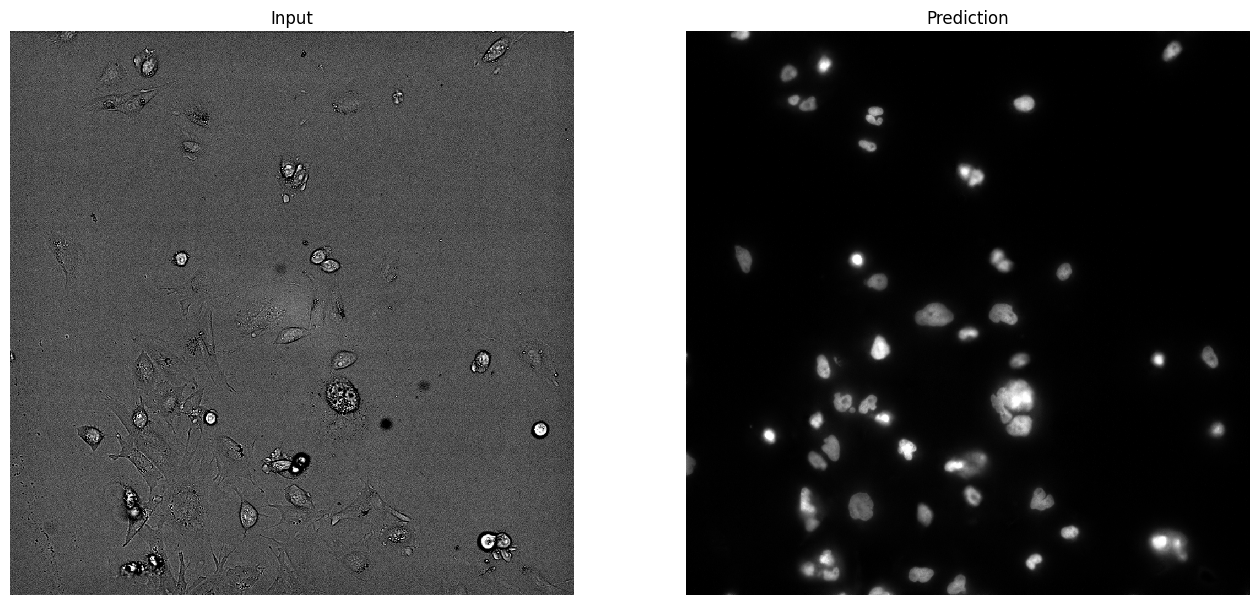

In [81]:
# @markdown ##Run this cell to display a randomly chosen input and its corresponding predicted output.
import os
# This will display a randomly chosen dataset input and predicted output
random_choice = random.choice(os.listdir(Data_folder))
random_choice_no_extension = os.path.splitext(random_choice)

results_path_test = os.path.join(Result_folder, Prediction_model_name, "test_"+str(checkpoint), "images")
x = imageio.imread(os.path.join(results_path_test + "_real_A", random_choice_no_extension[0]+"_real_A.png"))
y = imageio.imread(os.path.join(results_path_test + "_fake_B",random_choice_no_extension[0]+"_fake_B.png"))

f=plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(x, interpolation='nearest')
plt.title('Input')
plt.axis('off');

plt.subplot(1,2,2)
plt.imshow(y, interpolation='nearest')
plt.title('Prediction')
plt.axis('off');


## **6.3. Download your predictions**
---

<font size = 4>**Store your data** and ALL its results elsewhere by downloading it from Google Drive and after that clean the original folder tree (datasets, results, trained model etc.) if you plan to train or use new networks. Please note that the notebook will otherwise **OVERWRITE** all files which have the same name.

# **7. Version log**
---
<font size = 4>**v1.16.4**:
* Corrects data type and range in the bioimageio specs.
* Corrects for RGB data quality control SSIM.
  
<font size = 4>**v1.16.3**:
* Import the `bioimageio.core` library and export bioimage model zoo compatible models.

<font size = 4>**v1.16.2**:
* Loads data safely without temporary files starting with "."

<font size = 4>**v1.16.1**:
* Removes references to ?/content/'
* Uses predefined functions for the new images to make the code more readable


<font size = 4>**v1.15.1**:
* Many bug fixes by **Johanna Rahm**
* Number of channels

the number of channels for training/inferring with pix2pix is set to 3 by default. When using the notebook with grayscale images (=1 channel), color is predicted (see attached image). Setting the number of channels to 1 for grayscale data fixes this problem.

* Dataset mode

the default dataset_mode is "unaligned", which matches cyclegan network with non-matching source and target images.

Added --input_nc --output_nc and --dataset_mode flags to all training and prediction calls. The number of channels is set by the user by selecting grayscale or rgb from a dropdown menu in training, qc, and prediction.

* Image loading and normalisation fixes

Images used to be loaded with tifffile.imread(). Now it is changed to imageio.imread(), and added a description about the normalization parameters. Furthermore, in the training and qc section contrast streching was applied even though adaptive equalization was chosen, which is also fixed here.

* PDF librairy changed from fpdf to fpdf2



<font size = 4>**v1.13**:



*  The section 1 and 2 are now swapped for better export of *requirements.txt*.
This version also now includes built-in version check and the version log that

*   This version also now includes built-in version check and the version log that you're reading now.








# **Thank you for using pix2pix!**